In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import matplotlib.cm as cm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from scipy import io
from scipy import stats
from matplotlib.pyplot import cm
from scipy.stats import linregress
import scipy.stats as stats

/Users/tiffanyyeung/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# STA 160: Final Project Python Code #


## Section 1: Combining Data From Varied Sources to Create our Final Dataset ###

### No need to run this section of code ###

In [63]:
## Concatenates sports record data gathered manually on Sports Reference



# records_path = Path("C:/Users/mrcoo/Desktop/Fall 2024/STA 160/Data/Sports Results/FBS Data")
# FBS_data = pd.DataFrame()
# for file in records_path.glob("*.txt"):
#     tempdf = pd.read_csv(file)
#     tempdf = tempdf.rename(columns = {"Unnamed: 0": "Conference Rank", "Unnamed: 1": "School", "Unnamed: 2": "Conf",
#                                       "Overall": "Overall Football Wins", "Overall.1": "Overall Football Losses",
#                                       "Overall.2": "Overall Football Pct", "Conference": "Conference Football Wins",
#                                       "Conference.1": "Conference Football Losses", "Conference.2": "Conference Footall Pct",
#                                       "SRS.1": "SOS", "Polls": "AP FB Preseason Rank", "Polls.1": "AP FB High Rank",
#                                      "Polls.2": "AP FB Final Rank", "Unnamed: 16": "Notes"})
#     tempdf["Year"] = str(file)[70:74]
#     FBS_data = pd.concat([FBS_data, tempdf.iloc[1:,:]])
# FBS_data.to_csv("C:/Users/mrcoo/Desktop/Fall 2024/STA 160/Data/Sports Results/fbs_data_all.csv")

# records_path = Path("C:/Users/mrcoo/Desktop/Fall 2024/STA 160/Data/Sports Results/NCAAMB CSVs")
# BB_data = pd.DataFrame()
# for file in records_path.glob("*.txt"):
#     tempdf = pd.read_csv(file, usecols = [1, 2, 3, 4, 5, 6, 7, 9, 10])
#     tempdf = tempdf.rename(columns = {"Unnamed: 1": "School", "Overall": "BB GP", "Overall.1": "BB Total Wins",
#                                       "Overall.2": "BB Total Losses", "Overall.3": "BB Total Pct", "Overall.4": "SRS",
#                                      "Overall.5": "SOS", "Conf.": "BB Conf Wins", "Conf..1": "BB Conf Losses"})
#     tempdf = tempdf.iloc[1:,:]
#     tempdf["Tournament App"] = 0
#     tempdf["Year"] = str(file)[73:77]
#     for i in range(0,len(tempdf["School"])):
#         if "NCAA" in tempdf.iloc[i,0]:
#             tempdf.iloc[i,0] = tempdf.iloc[i,0][:-5]
#             tempdf.iloc[i,9] = 1
#     BB_data = pd.concat([BB_data, tempdf])
# BB_data.to_csv("C:/Users/mrcoo/Desktop/Fall 2024/STA 160/Data/Sports Results/ncaab_data_all.csv")

# BB_data["School"] = BB_data["School"].astype(str)
# BB_data["Year"] = BB_data["Year"].astype(str)
# FBS_data["School"] = FBS_data["School"].astype(str)
# FBS_data["Year"] = FBS_data["Year"].astype(str)
# all_records = pd.merge(FBS_data, BB_data, how = "outer", on = ["School", "Year"])
# #all_records.to_csv("C:/Users/mrcoo/Downloads/all_records.csv")



In [64]:
# ## Combines Knight-Newhouse data with Department of Education data

# big_columns_keep = ["UNITID", "OPEID", "OPEID6", "INSTNM", "STABBR", "ADM_RATE", "SAT_AVG", "COMP_ORIG_YR4_RT","TRANS_4", 
#                     "OVERALL_YR4_N", "RET_FT4"]
# college_path = Path("C:/Users/mrcoo/Desktop/Fall 2024/STA 160/Data/Institutional Data/College_Scorecard_Raw_Data_09242024/Data to Use")
# inst_data = pd.DataFrame()
# for file in college_path.glob("*.csv"):
#     cur_year = str(file)[119:123]
#     tempdf = pd.read_csv(file,sep=',',na_values="NAN",engine='python', usecols = big_columns_keep)
#     tempdf["Year"] = cur_year
#     inst_data = pd.concat([inst_data, tempdf], ignore_index=True)
# inst_data["UNITID"] = inst_data["UNITID"].astype(str)

# sports_money = Path("C:/Users/mrcoo/Desktop/Fall 2024/STA 160/Data/Sports Financials")
# money_data = pd.DataFrame()
# for file in sports_money.glob("*.xlsx"):
#     tempdf = pd.read_excel(file,na_values="NAN")
#     money_data = pd.concat([money_data, tempdf], ignore_index=True)
# money_data["UNITID"] = money_data["IPEDS ID"].astype(str)
# money_data["Year"] = money_data["Year"].astype(str)

# sports_college_data = pd.merge(inst_data,money_data, how = "outer", on = ["UNITID", "Year"])
# sports_college_data = sports_college_data.dropna(subset = ["NCAA Subdivision", "INSTNM", "Total Expenses", "Total Revenues"])
# sports_college_data = sports_college_data.drop(["OPEID", "OPEID6", "Data"], axis = 1)
# sports_college_data
# #sports_college_data.to_csv("C:/Users/mrcoo/Desktop/Fall 2024/STA 160/Data/sports_money_and_college_data.csv")


In [65]:
# name_conv = pd.read_excel("C:/Users/mrcoo/Desktop/Fall 2024/STA 160/name conversion colleges.xlsx")
# name_dict = dict()
# codes = name_conv["UNITID"].unique()
# names = name_conv["unofficial_name"].unique()
# for i in range(0, len(codes)):
#     name_dict[codes[i]] = names[i]
    
# fbs_data = pd.read_csv("C:/Users/mrcoo/Desktop/Fall 2024/STA 160/Data/Sports Results/fbs_data_all.csv")
# fbs_data
# temp_fbs = fbs_data[["School", "Year", "Conference Football Wins", "Conference Football Losses", "Overall Football Wins", "Overall Football Losses"]]
# temp_fbs = temp_fbs.rename(columns = {"Conference Football Wins": "Conf_Wins", "Conference Football Losses": "Conf_Losses",
#                                      "Overall Football Wins": "Tot_Wins", "Overall Football Losses": "Tot_Losses", "School": "unofficial_name"})
# fcs_data = fcs_data.rename(columns = {"College": "unofficial_name"})

# fcs_data = pd.read_csv("C:/Users/mrcoo/Desktop/Fall 2024/STA 160/Data/all_fcs_data.csv")
# college_data = pd.read_csv("C:/Users/mrcoo/Desktop/Fall 2024/STA 160/Data/sports_money_and_college_data.csv")
# name_list = []
# for i in range(0, len(college_data)):
#     name_list.append(name_dict[college_data["UNITID"][i]])
# college_data["unofficial_name"] = name_list

# fcs_data = fcs_data.rename(columns = {"College": "unofficial_name"})
# temp_look = college_data[["UNITID", "INSTNM", "unofficial_name", "Year"]]
# i_look = pd.merge(temp_look, temp_fbs, how = "outer", on = ["unofficial_name", "Year"])
# football = i_look

# basketball = pd.read_csv("C:/Users/mrcoo/Desktop/Fall 2024/STA 160/Data/Sports Results/ncaab_data_all.csv")
# basketball = basketball[["School", "Year", "BB Total Wins", "BB Total Losses", "BB Conf Wins", "BB Conf Losses", "Tournament App"]]
# basketball = basketball.rename(columns = {"School": "unofficial_name"})
# combined = pd.merge(football, basketball, how = "outer", on = ["unofficial_name", "Year"])

# money = pd.read_csv("C:/Users/mrcoo/Desktop/Fall 2024/STA 160/Data/sports_money_and_college_data.csv")
# obs_all = pd.merge(money, combined, how = "outer", on = ["UNITID", "Year", "INSTNM"])
# missing_data = obs_all[obs_all["INSTNM"].isna()]["unofficial_name"]
# missing_data.unique()
# obs_all = obs_all.dropna(subset = ["INSTNM", "UNITID"])

## Subquestion 1: Where, if any, do we see noticeable differences in trends during covid years? 

### Exploratory Data Analysis ###

In [5]:
#Reading the data in
data = pd.read_csv('sports_obs_all.csv')
data = data.rename(columns = {'Unnamed: 0' : 'School Number'})

In [6]:
#isolating columns with int or float values in order to make a heatmap
names = data.columns.tolist()

data_adjusted_names = []

for name, types in zip(names, data.dtypes):
    if types == 'int64' or types == 'float64':
        #print(name)
        data_adjusted_names.append(name)
    

#Checking if linear regression will work with correlation coefficient
#Also going to do a heatmap to see which variables are highly confounding

data_adjusted = data[data_adjusted_names].drop(columns = ['UNITID', 'TRANS_4', 'RET_FT4', 'IPEDS ID'])
data_adjusted = data_adjusted.dropna(axis = 1)

data_adjusted.head(10)
corr = data_adjusted.drop(columns = ['Total Academic Spending (University-Wide)']).corr()

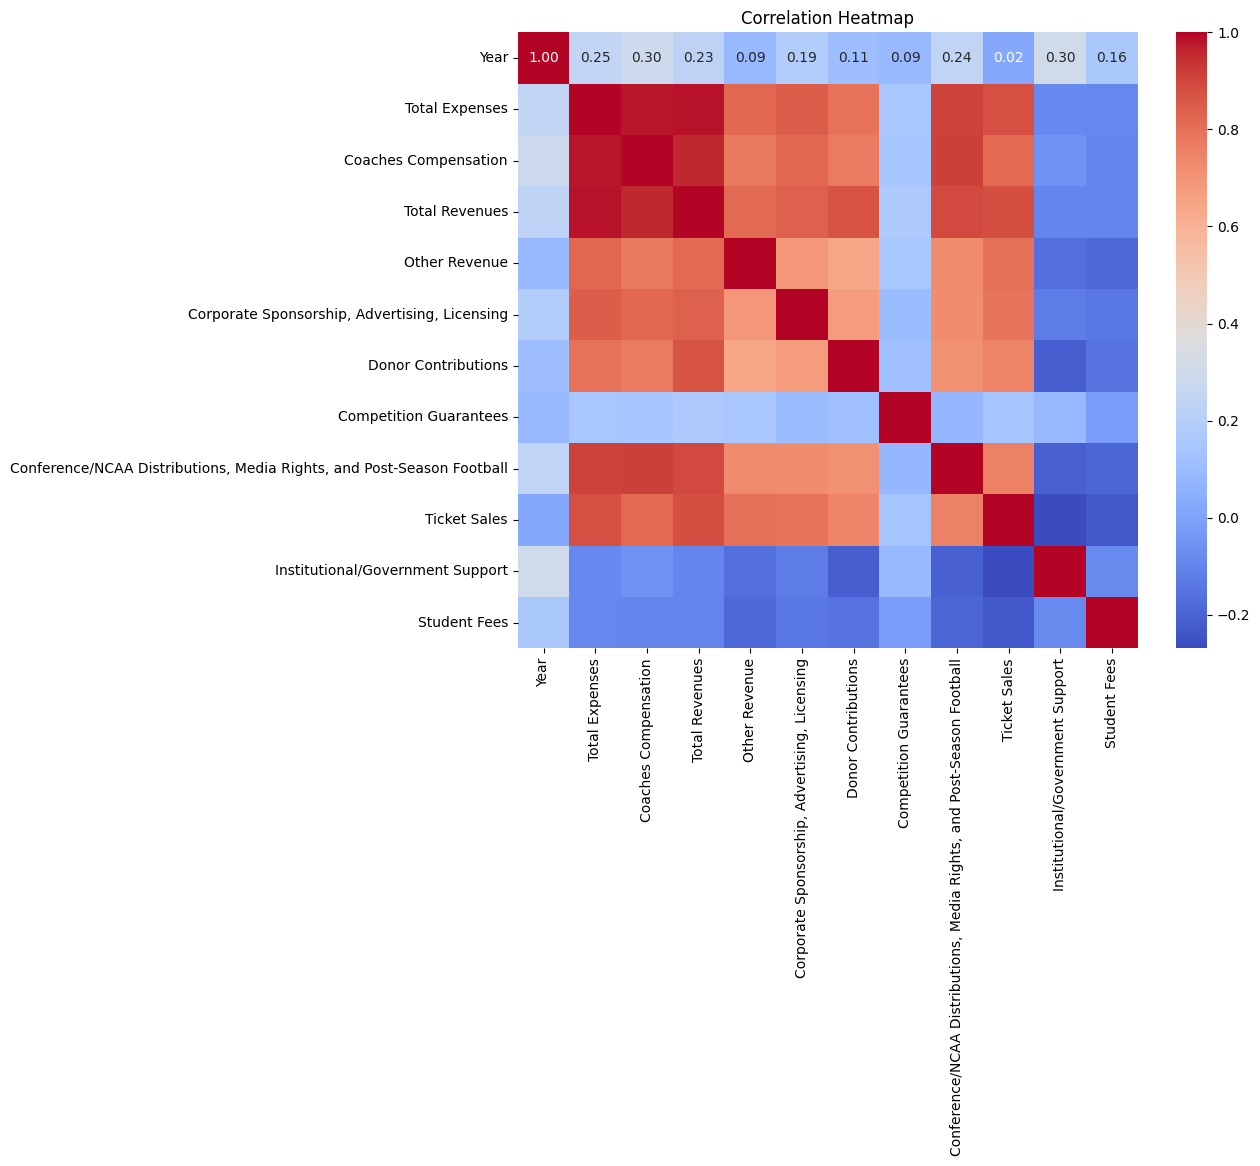

In [7]:
#heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

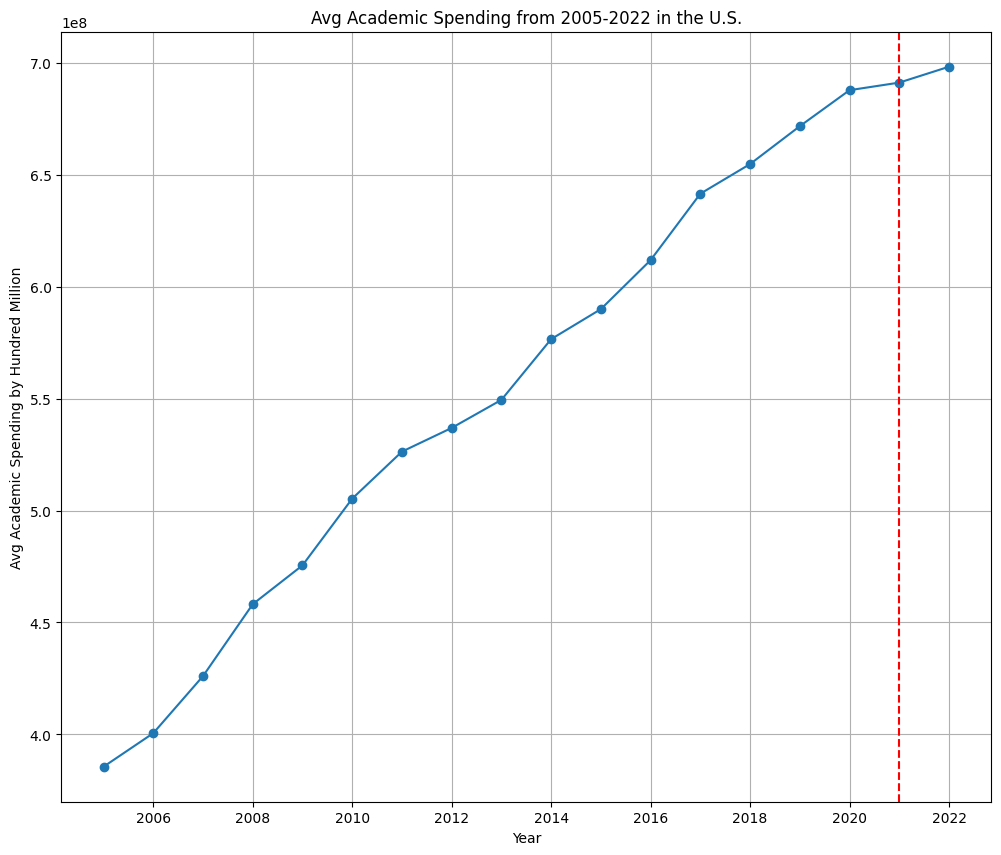

In [8]:
#Avg of variable Total Academic Spending
#Grouping by Year 

avg_spending_year = data.groupby('Year')['Total Academic Spending (University-Wide)'].mean().reset_index()

plt.figure(figsize = (12,10))

plt.xlabel('Year')
plt.ylabel('Avg Academic Spending by Hundred Million')
plt.title('Avg Academic Spending from 2005-2022 in the U.S.')
plt.plot(avg_spending_year['Year'], avg_spending_year['Total Academic Spending (University-Wide)'], marker = 'o')

plt.gca().xaxis.set_major_locator(MultipleLocator(2))  
plt.axvline(x = 2021, color = 'r', linestyle = '--')
plt.grid(True)
plt.show()

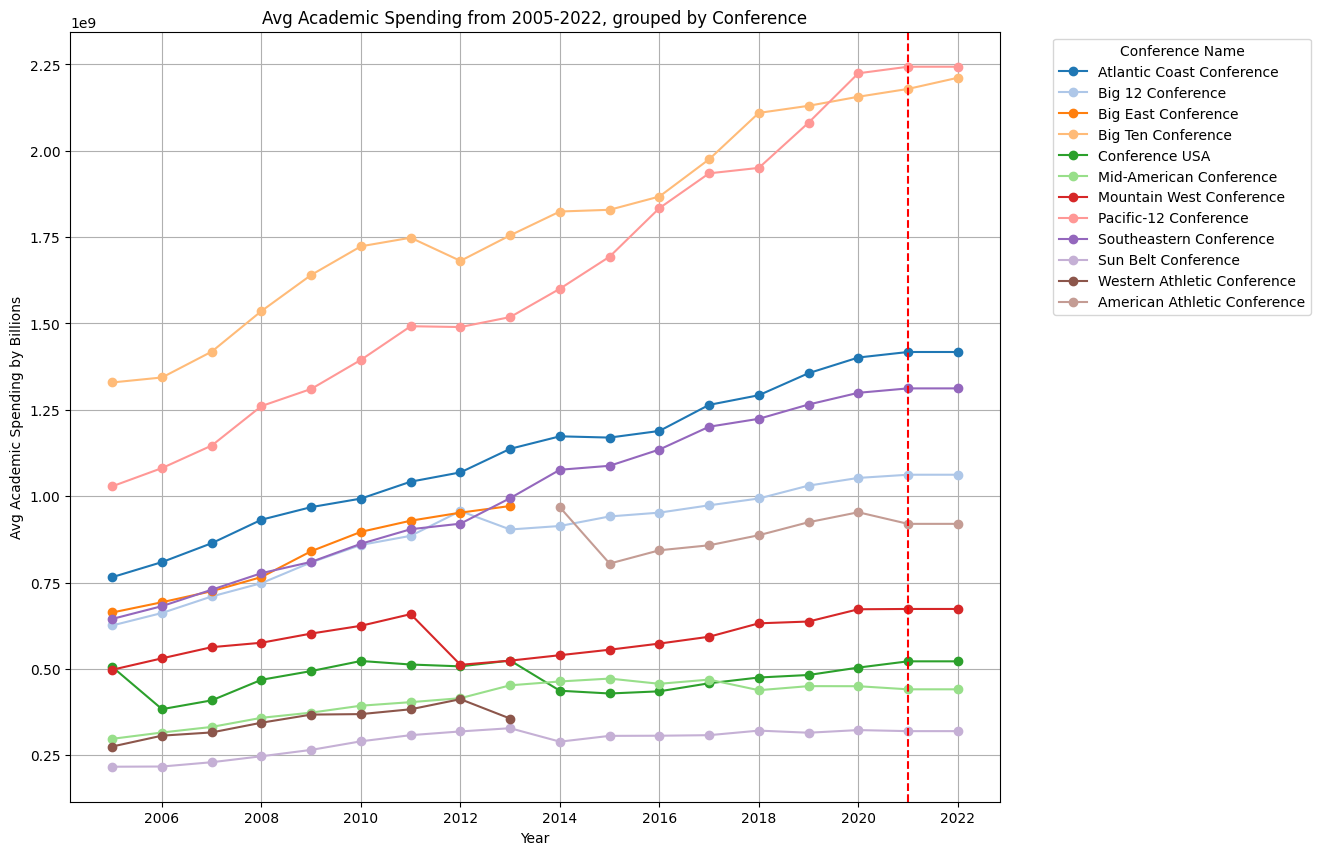

In [9]:
#first group data by Year and FBS Conference
#then calculate averages based on each Year and Conference combination
#so the table displays the Avg Academic Spending (University-Wide) of the given Conference in the given year

avg_spending_by_conference = data.groupby(['Year', 'FBS Conference'])['Total Academic Spending (University-Wide)'].mean().reset_index()
avg_spending_by_conference.rename(columns = {'Total Academic Spending (University-Wide)': 'Avg Academic Spending'}, inplace = True)
avg_spending_by_conference['FBS Conference'].unique()
avg_spending_by_conference = avg_spending_by_conference[avg_spending_by_conference['FBS Conference'] != 'Independent']

avg_spending_by_conference[avg_spending_by_conference['Year'] == 2007]

#Average Academic Spending done by each Conference over the years (from 2005-2022) 

plt.figure(figsize = (12,10))
colors = plt.cm.tab20.colors

for i, conf in enumerate(avg_spending_by_conference['FBS Conference'].unique()):        
    school_data = avg_spending_by_conference[avg_spending_by_conference['FBS Conference'] == conf]
    plt.plot(school_data['Year'], school_data['Avg Academic Spending'], marker = 'o', label = conf, color=colors[i % len(colors)])
    
plt.xlabel('Year')
plt.ylabel('Avg Academic Spending by Billions')
plt.title('Avg Academic Spending from 2005-2022, grouped by Conference')
plt.legend(title='Conference Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gca().xaxis.set_major_locator(MultipleLocator(2))  
#plt.gca().yaxis.set_major_locator(MultipleLocator(0.01))  
plt.axvline(x = 2021, color = 'r', linestyle = '--')
plt.grid(True)
plt.show()

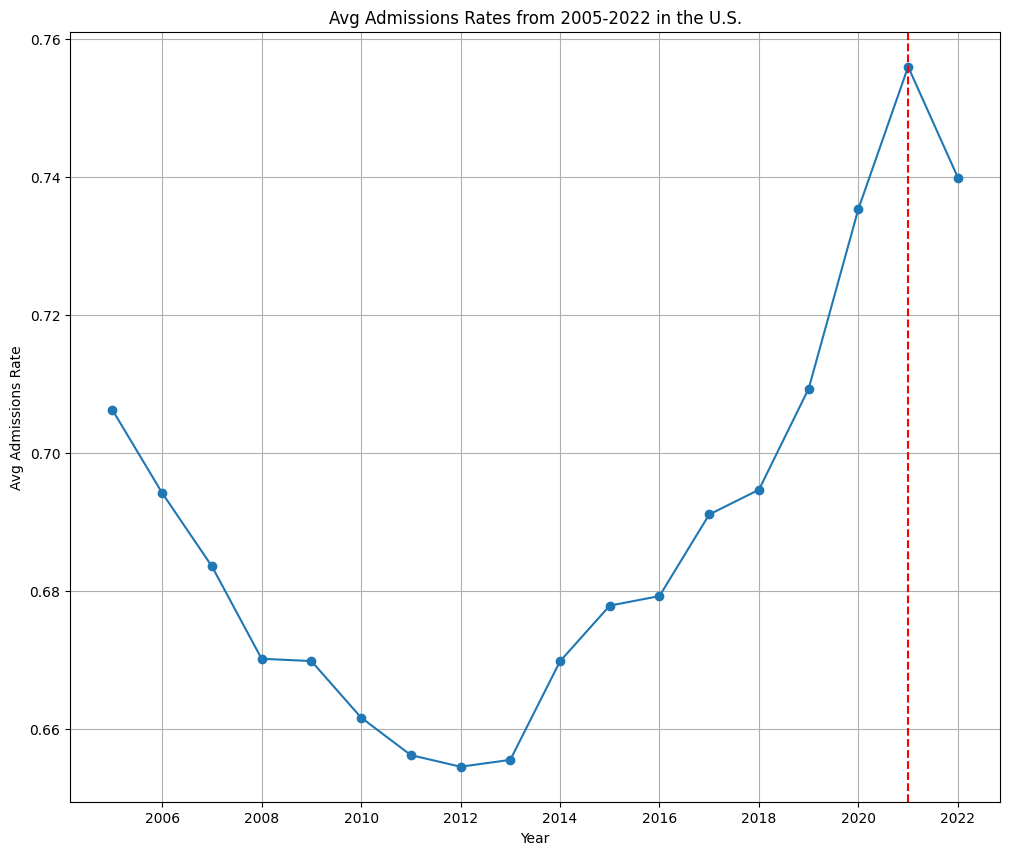

In [10]:
#Avg Admissions Rates, grouped by Year 

avg_admissions_year = data.groupby('Year')['ADM_RATE'].mean().reset_index()

plt.figure(figsize = (12,10))

plt.xlabel('Year')
plt.ylabel('Avg Admissions Rate')
plt.title('Avg Admissions Rates from 2005-2022 in the U.S.')
plt.plot(avg_admissions_year['Year'], avg_admissions_year['ADM_RATE'], marker = 'o')

plt.gca().xaxis.set_major_locator(MultipleLocator(2))  
plt.axvline(x = 2021, color = 'r', linestyle = '--')
plt.grid(True)
plt.show()

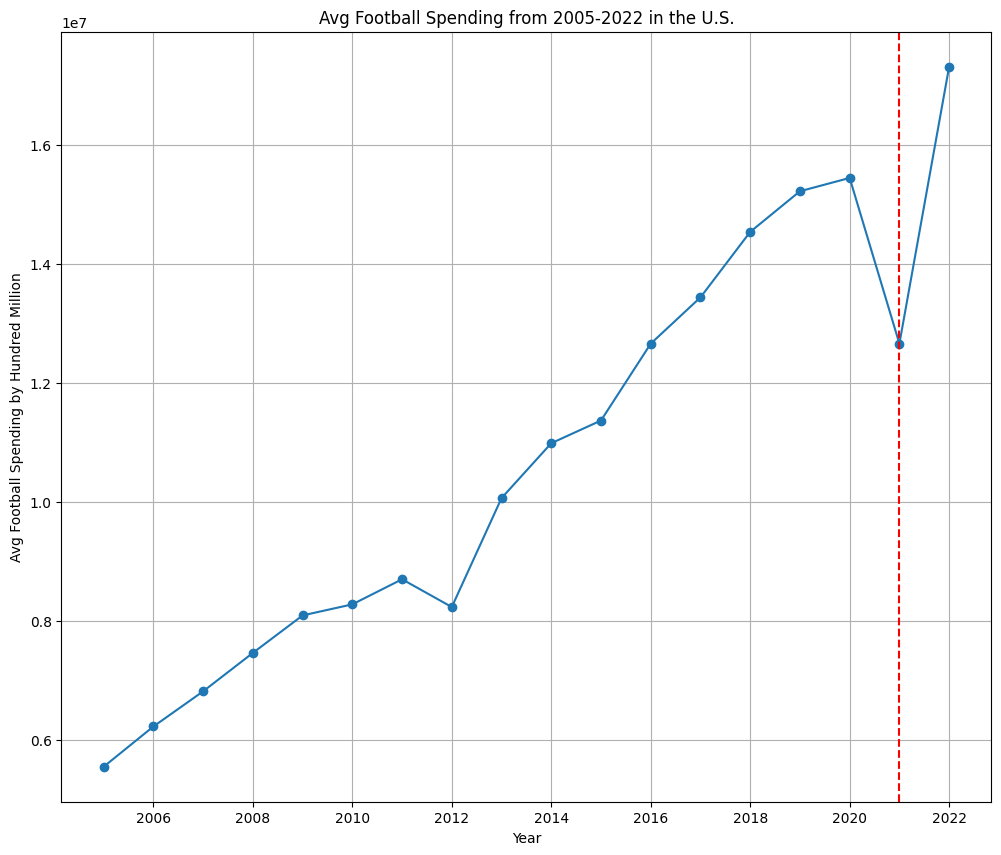

In [11]:
#Avg Total Football Spending, Grouping by Year 

avg_football_spending_year = data.groupby('Year')['Total Football Spending'].mean().reset_index()

plt.figure(figsize = (12,10))

plt.xlabel('Year')
plt.ylabel('Avg Football Spending by Hundred Million')
plt.title('Avg Football Spending from 2005-2022 in the U.S.')
plt.plot(avg_football_spending_year['Year'], avg_football_spending_year['Total Football Spending'], marker = 'o')

plt.gca().xaxis.set_major_locator(MultipleLocator(2))  
plt.axvline(x = 2021, color = 'r', linestyle = '--')
plt.grid(True)
plt.show()

### Methods

Random Forest MSE: 225300121659178112.00
Random Forest R^2: 0.64


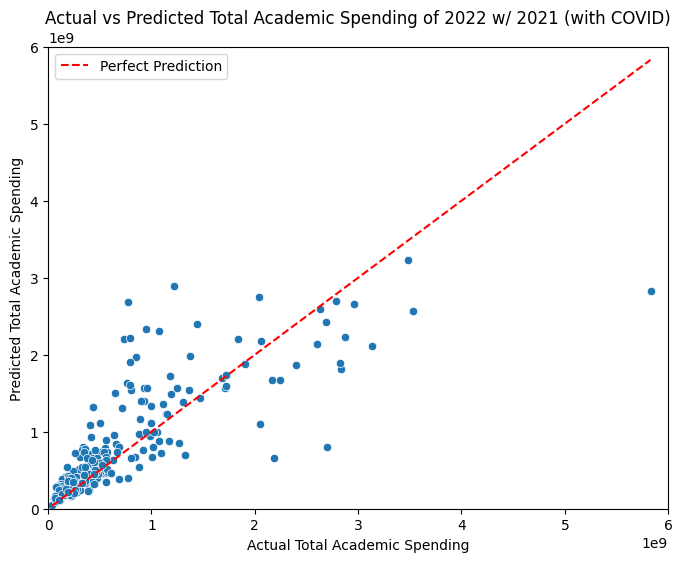

In [12]:
#Seeing as our data demonstrates generally nonlinear patterns, will use Random Forest
#I want to train on 2005-2020 (for no COVID) or 2005-2021 (for COVID) then predict for 2022
#ok now i want my train set to include 2021
#and my test set is just 2022 data

X = data_adjusted.drop(columns = ['Total Academic Spending (University-Wide)'])
y = data_adjusted[['Total Academic Spending (University-Wide)', 'Year']]


X_train = X[X['Year'] != 2022]
X_test = X[X['Year'] == 2022]

y_train = y[y['Year'] != 2022]
y_test = y[y['Year'] == 2022]

rf_model = RandomForestRegressor(n_estimators=100, random_state=123)  
rf_model.fit(X_train, y_train['Total Academic Spending (University-Wide)'])

y_pred_with2021 = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test['Total Academic Spending (University-Wide)'], y_pred_with2021)
r2 = rf_model.score(X_test, y_test['Total Academic Spending (University-Wide)'])

print(f"Random Forest MSE: {mse:.2f}")
print(f"Random Forest R^2: {r2:.2f}")

#Plotting actual vs predicted
#with diagonal dotted line that represents perfect predictions

comparison_df = pd.DataFrame({
    'Actual': y_test['Total Academic Spending (University-Wide)'],
    'Predicted': y_pred_with2021
})
#comparison_df

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Actual', y='Predicted', data=comparison_df)

plt.plot([comparison_df['Actual'].min(), comparison_df['Actual'].max()],
         [comparison_df['Actual'].min(), comparison_df['Actual'].max()],
         color='red', linestyle='--', label="Perfect Prediction")

plt.xlim(0, 6000000000)  
plt.ylim(0, 6000000000)  

plt.title('Actual vs Predicted Total Academic Spending of 2022 w/ 2021 (with COVID)')
plt.xlabel('Actual Total Academic Spending')
plt.ylabel('Predicted Total Academic Spending')
plt.legend()
plt.show()

Random Forest MSE: 242117953924590848.00
Random Forest R^2: 0.61


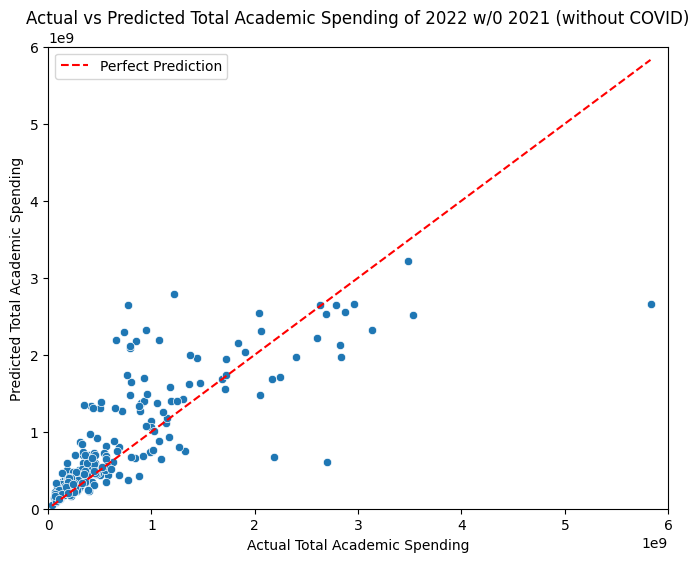

In [13]:
#ok now i want my train set to not include 2021

X = data_adjusted.drop(columns = ['Total Academic Spending (University-Wide)'])
y = data_adjusted[['Total Academic Spending (University-Wide)', 'Year']]


X_train = X[~X['Year'].isin([2021, 2022])]
X_test = X[X['Year'] == 2022]

y_train = y[~y['Year'].isin([2021, 2022])]
y_test = y[y['Year'] == 2022]

rf_model = RandomForestRegressor(n_estimators=100, random_state=123)  
rf_model.fit(X_train, y_train['Total Academic Spending (University-Wide)'])

y_pred_without2021 = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test['Total Academic Spending (University-Wide)'], y_pred_without2021)
r2 = rf_model.score(X_test, y_test['Total Academic Spending (University-Wide)'])

print(f"Random Forest MSE: {mse:.2f}")
print(f"Random Forest R^2: {r2:.2f}")

#Plotting actual vs predicted
#with diagonal dotted line that represents perfect predictions

comparison_df = pd.DataFrame({
    'Actual': y_test['Total Academic Spending (University-Wide)'],
    'Predicted': y_pred_without2021
})
comparison_df

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Actual', y='Predicted', data=comparison_df)

plt.plot([comparison_df['Actual'].min(), comparison_df['Actual'].max()],
         [comparison_df['Actual'].min(), comparison_df['Actual'].max()],
         color='red', linestyle='--', label="Perfect Prediction")

plt.xlim(0, 6000000000)  
plt.ylim(0, 6000000000)  

plt.title('Actual vs Predicted Total Academic Spending of 2022 w/0 2021 (without COVID)')
plt.xlabel('Actual Total Academic Spending')
plt.ylabel('Predicted Total Academic Spending')
plt.legend()
plt.show()

In [14]:
#Now Looking into Total Football Spending

#making adjustments to data to include relevant features
names = data.columns.tolist()

data_adjusted_names = []

for name, types in zip(names, data.dtypes):
    if types == 'int64' or types == 'float64':
        #print(name)
        data_adjusted_names.append(name)
    

#Checking if linear regression will work with correlation coefficient
#Also going to do a heatmap to see which variables are highly confounding

data_adjusted = data[data_adjusted_names].drop(columns = ['UNITID', 
                                                          'TRANS_4', 
                                                          'IPEDS ID', 
                                                          'SAT_AVG', 
                                                          'RET_FT4', 
                                                          'COMP_ORIG_YR4_RT', 
                                                          'OVERALL_YR4_N'
                                                         ])
#data_adjusted = data_adjusted.dropna(axis = 1)

data_adjusted.columns.tolist()
data_adjusted = data_adjusted.fillna(0)
corr = data_adjusted.corr()

X = data_adjusted.drop(columns = ['Total Football Spending', 'Total Academic Spending (University-Wide)'])
y = data_adjusted[['Total Football Spending', 'Year']]


X_train = X[X['Year'] != 2022]
X_test = X[X['Year'] == 2022]

y_train = y[y['Year'] != 2022]
y_test = y[y['Year'] == 2022]

rf_model = RandomForestRegressor(n_estimators=100, random_state=123)  
rf_model.fit(X_train, y_train['Total Football Spending'])

y_pred_with2021 = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test['Total Football Spending'], y_pred_with2021)
r2 = rf_model.score(X_test, y_test['Total Football Spending'])

print(f"Random Forest MSE: {mse:.2f}")
print(f"Random Forest R^2: {r2:.2f}")

# Assuming rf_model is your trained random forest model
importances = rf_model.feature_importances_
feature_names = X.columns

#getting an idea of relevant features for predictive purposes
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feature_importance_df.head(5)

Random Forest MSE: 15448107703794.48
Random Forest R^2: 0.94


,Feature,Importance
14,Total Football Coaching Salaries,0.470786
2,Total Expenses,0.206531
4,Coaches Compensation,0.131711
10,"Conference/NCAA Distributions, Media Rights, a...",0.080071
5,Total Revenues,0.053399


Random Forest MSE with 2021 included: 19748018707987.80
Random Forest R^2 with 2021 included: 0.93


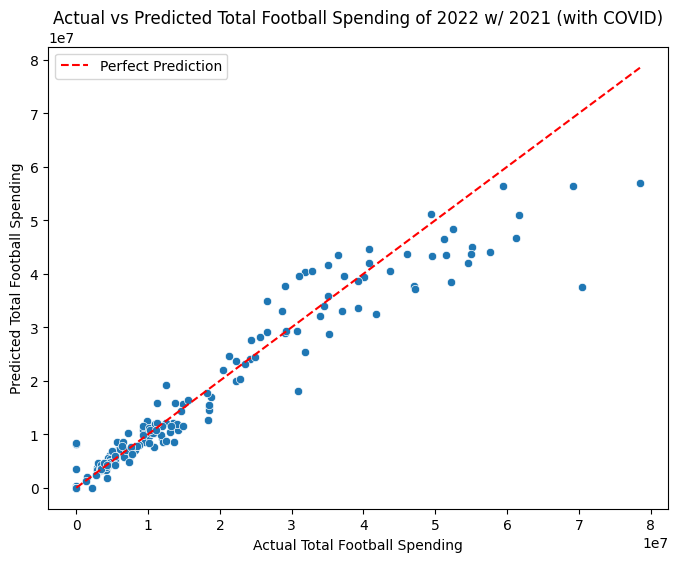

In [15]:
#Predicting with most relevant features to address overfitting
#Including 2021 when predicting Total Football Spending of 2022

features = feature_importance_df.head(5)['Feature'].tolist()
data_adjusted_again = data_adjusted[features]
features.append('Year')

X = data_adjusted[features]
y = data_adjusted[['Total Football Spending', 'Year']]


X_train = X[X['Year'] != 2022]
X_test = X[X['Year'] == 2022]

y_train = y[y['Year'] != 2022]
y_test = y[y['Year'] == 2022]

rf_model = RandomForestRegressor(n_estimators=100, random_state=123)  
rf_model.fit(X_train, y_train['Total Football Spending'])

y_pred_with2021 = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test['Total Football Spending'], y_pred_with2021)
r2 = rf_model.score(X_test, y_test['Total Football Spending'])

print(f"Random Forest MSE with 2021 included: {mse:.2f}")
print(f"Random Forest R^2 with 2021 included: {r2:.2f}")

#Plotting
comparison_df = pd.DataFrame({
    'Actual': y_test['Total Football Spending'],
    'Predicted': y_pred_with2021
})
comparison_df

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Actual', y='Predicted', data=comparison_df)

plt.plot([comparison_df['Actual'].min(), comparison_df['Actual'].max()],
         [comparison_df['Actual'].min(), comparison_df['Actual'].max()],
         color='red', linestyle='--', label="Perfect Prediction")

#plt.xlim(0, 6000000000)  
#plt.ylim(0, 6000000000)  

plt.title('Actual vs Predicted Total Football Spending of 2022 w/ 2021 (with COVID)')
plt.xlabel('Actual Total Football Spending')
plt.ylabel('Predicted Total Football Spending')
plt.legend()
plt.show()

Random Forest MSE without 2021: 18185864457724.57
Random Forest R^2 without 2021: 0.94


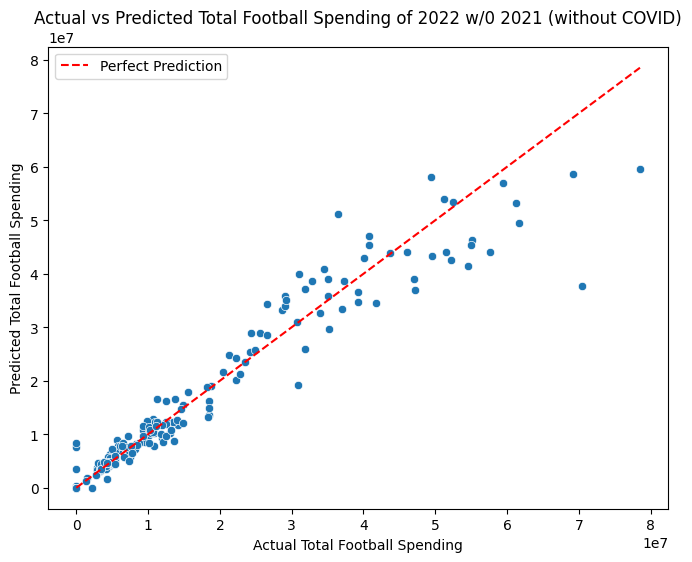

In [16]:
#Now excluding 2021 when predicting on 2022

features = feature_importance_df.head(5)['Feature'].tolist()
data_adjusted_again = data_adjusted[features]
features.append('Year')

X = data_adjusted[features]
y = data_adjusted[['Total Football Spending', 'Year']]

#ok now what if I want to train on 2005-2020 (for no COVID) or 2005-2021 (for COVID) then predict for 2022

X_train = X[~X['Year'].isin([2021, 2022])]
X_test = X[X['Year'] == 2022]

y_train = y[~y['Year'].isin([2021, 2022])]
y_test = y[y['Year'] == 2022]

rf_model = RandomForestRegressor(n_estimators=100, random_state=123)  
rf_model.fit(X_train, y_train['Total Football Spending'])

y_pred_without2021 = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test['Total Football Spending'], y_pred_without2021)
r2 = rf_model.score(X_test, y_test['Total Football Spending'])

print(f"Random Forest MSE without 2021: {mse:.2f}")
print(f"Random Forest R^2 without 2021: {r2:.2f}")

#Plotting

comparison_df = pd.DataFrame({
    'Actual': y_test['Total Football Spending'],
    'Predicted': y_pred_without2021
})
comparison_df

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Actual', y='Predicted', data=comparison_df)

plt.plot([comparison_df['Actual'].min(), comparison_df['Actual'].max()],
         [comparison_df['Actual'].min(), comparison_df['Actual'].max()],
         color='red', linestyle='--', label="Perfect Prediction")

#plt.xlim(0, 6000000000)  
#plt.ylim(0, 6000000000)  

plt.title('Actual vs Predicted Total Football Spending of 2022 w/0 2021 (without COVID)')
plt.xlabel('Actual Total Football Spending')
plt.ylabel('Predicted Total Football Spending')
plt.legend()
plt.show()

In [17]:
#Now looking at Admission Rates

X = data_adjusted.drop(columns = ['ADM_RATE'])
y = data_adjusted[['ADM_RATE', 'Year']]


X_train = X[X['Year'] != 2022]
X_test = X[X['Year'] == 2022]

y_train = y[y['Year'] != 2022]
y_test = y[y['Year'] == 2022]

rf_model = RandomForestRegressor(n_estimators=100, random_state=123)  
rf_model.fit(X_train, y_train['ADM_RATE'])

y_pred_with2021 = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test['ADM_RATE'], y_pred_with2021)
r2 = rf_model.score(X_test, y_test['ADM_RATE'])

print(f"Random Forest MSE with 2021 included: {mse:.2f}")
print(f"Random Forest R^2 with 2021 included: {r2:.2f}")

#Getting feature importance
importances = rf_model.feature_importances_
feature_names = X.columns

#storing feature importances in a dataframe
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feature_importance_df.head(5)

Random Forest MSE with 2021 included: 0.04
Random Forest R^2 with 2021 included: 0.24


,Feature,Importance
13,Total Academic Spending (University-Wide),0.132669
12,Student Fees,0.087982
7,Donor Contributions,0.070219
6,"Corporate Sponsorship, Advertising, Licensing",0.064976
11,Institutional/Government Support,0.063737


Random Forest MSE with 2021 included: 0.03
Random Forest R^2 with 2021 included: 0.52


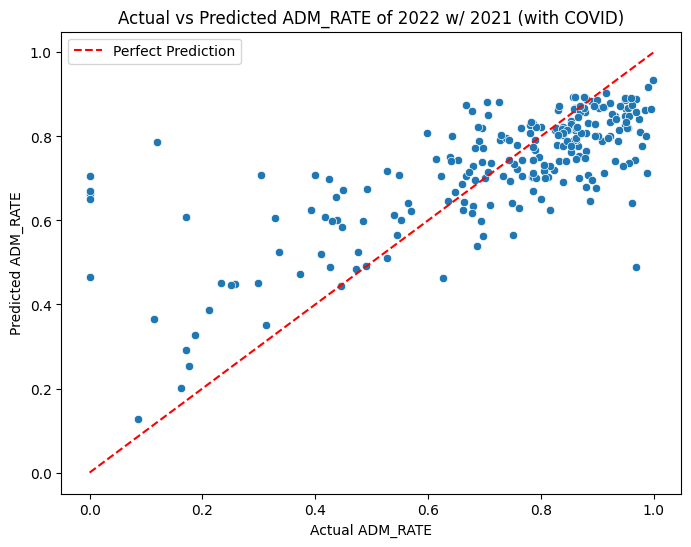

In [18]:
#Now isolating top 5 features for predictive analysis
#2021 included when predicting 2022 admission rates

features = feature_importance_df.head(5)['Feature'].tolist()
data_adjusted_again = data_adjusted[features]
features.append('Year')

X = data_adjusted[features]
y = data_adjusted[['ADM_RATE', 'Year']]


X_train = X[X['Year'] != 2022]
X_test = X[X['Year'] == 2022]

y_train = y[y['Year'] != 2022]
y_test = y[y['Year'] == 2022]

rf_model = RandomForestRegressor(n_estimators=100, random_state=123)  
rf_model.fit(X_train, y_train['ADM_RATE'])

y_pred_with2021 = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test['ADM_RATE'], y_pred_with2021)
r2 = rf_model.score(X_test, y_test['ADM_RATE'])

print(f"Random Forest MSE with 2021 included: {mse:.2f}")
print(f"Random Forest R^2 with 2021 included: {r2:.2f}")

#Plotting

comparison_df = pd.DataFrame({
    'Actual': y_test['ADM_RATE'],
    'Predicted': y_pred_with2021
})
comparison_df

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Actual', y='Predicted', data=comparison_df)

plt.plot([comparison_df['Actual'].min(), comparison_df['Actual'].max()],
         [comparison_df['Actual'].min(), comparison_df['Actual'].max()],
         color='red', linestyle='--', label="Perfect Prediction")

#plt.xlim(0, 6000000000)  
#plt.ylim(0, 6000000000)  

plt.title('Actual vs Predicted ADM_RATE of 2022 w/ 2021 (with COVID)')
plt.xlabel('Actual ADM_RATE')
plt.ylabel('Predicted ADM_RATE')
plt.legend()
plt.show()

Random Forest MSE without 2021: 0.03
Random Forest R^2 without 2021: 0.41


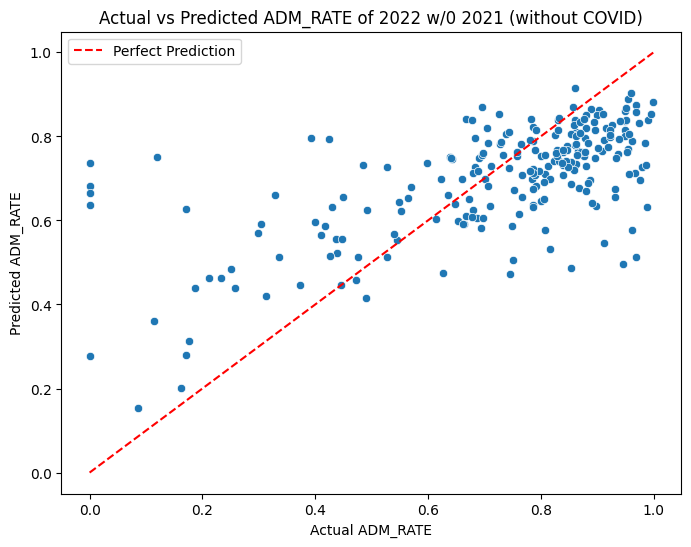

In [19]:
#Now doing the same thing but with 2021 excluded

features = feature_importance_df.head(5)['Feature'].tolist()
data_adjusted_again = data_adjusted[features]
features.append('Year')

X = data_adjusted[features]
y = data_adjusted[['ADM_RATE', 'Year']]

#ok now what if I want to train on 2005-2020 (for no COVID) or 2005-2021 (for COVID) then predict for 2022

X_train = X[~X['Year'].isin([2021, 2022])]
X_test = X[X['Year'] == 2022]

y_train = y[~y['Year'].isin([2021, 2022])]
y_test = y[y['Year'] == 2022]

rf_model = RandomForestRegressor(n_estimators=100, random_state=123)  
rf_model.fit(X_train, y_train['ADM_RATE'])

y_pred_without2021 = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test['ADM_RATE'], y_pred_without2021)
r2 = rf_model.score(X_test, y_test['ADM_RATE'])

print(f"Random Forest MSE without 2021: {mse:.2f}")
print(f"Random Forest R^2 without 2021: {r2:.2f}")

#Plotting

comparison_df = pd.DataFrame({
    'Actual': y_test['ADM_RATE'],
    'Predicted': y_pred_without2021
})
comparison_df

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Actual', y='Predicted', data=comparison_df)

plt.plot([comparison_df['Actual'].min(), comparison_df['Actual'].max()],
         [comparison_df['Actual'].min(), comparison_df['Actual'].max()],
         color='red', linestyle='--', label="Perfect Prediction")

#plt.xlim(0, 6000000000)  
#plt.ylim(0, 6000000000)  

plt.title('Actual vs Predicted ADM_RATE of 2022 w/0 2021 (without COVID)')
plt.xlabel('Actual ADM_RATE')
plt.ylabel('Predicted ADM_RATE')
plt.legend()
plt.show()

## Subquestion 2: What are the effects of football playoff wins on the money regarding sports (coming in and going out)?

### EDA

In [20]:
data_unfiltered = pd.read_csv('sports_obs_all.csv')

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

data_unfiltered['Football Spending %'] = data_unfiltered['Total Football Spending'] / data_unfiltered['Total Academic Spending (University-Wide)']
data_unfiltered['Total Football Spending'] = pd.to_numeric(data_unfiltered['Total Football Spending'], errors='coerce')
data = data_unfiltered.dropna(subset = ["FBS Conference", "Total Football Spending", "Football Spending %", "ADM_RATE"])
data = data[data['FBS Conference'] != 'Independent']
data = data[(data['Total Football Spending'] != 0) & (data['ADM_RATE'] != 0)]
data["% Win"] = data["Tot_Wins"]/(data["Tot_Wins"]+data["Tot_Losses"])

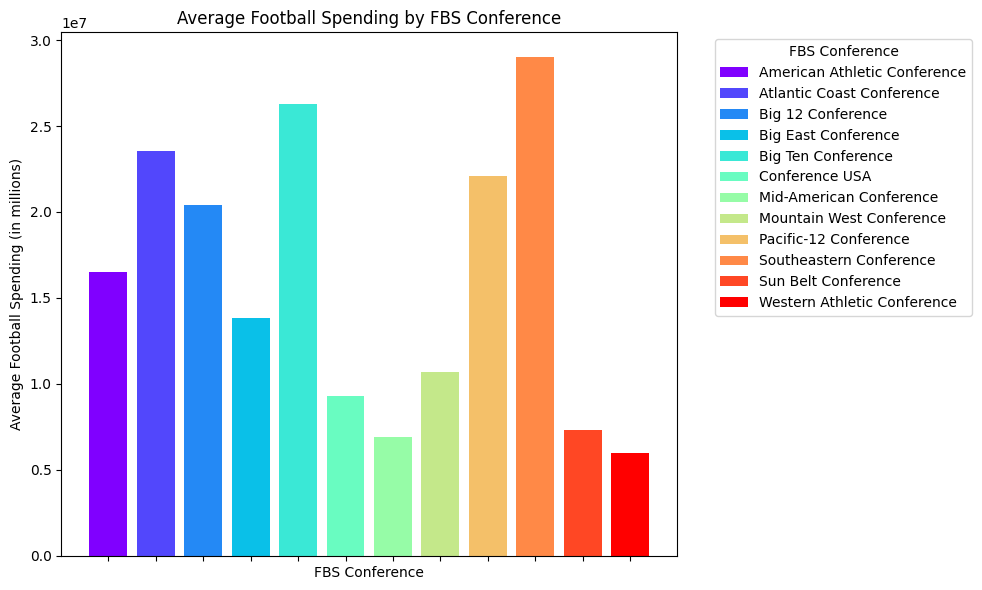

In [21]:
#FB Spending by Conf
avg_spend_conf = data.groupby(["FBS Conference"])["Total Football Spending"].mean().reset_index()

plt.figure(figsize = (10, 6))

color = iter(cm.rainbow(np.linspace(0, 1, len(avg_spend_conf['FBS Conference']))))

for index, row in avg_spend_conf.iterrows():
    c = next(color)
    plt.bar(row['FBS Conference'], row['Total Football Spending'], label = row['FBS Conference'], color = c)

plt.tick_params(
    axis = 'x',          
    which = 'both',            
    labelbottom = False) 

plt.title('Average Football Spending by FBS Conference')
plt.xlabel('FBS Conference')
plt.ylabel('Average Football Spending (in millions)')

plt.legend(title = 'FBS Conference', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.tight_layout()
plt.show()

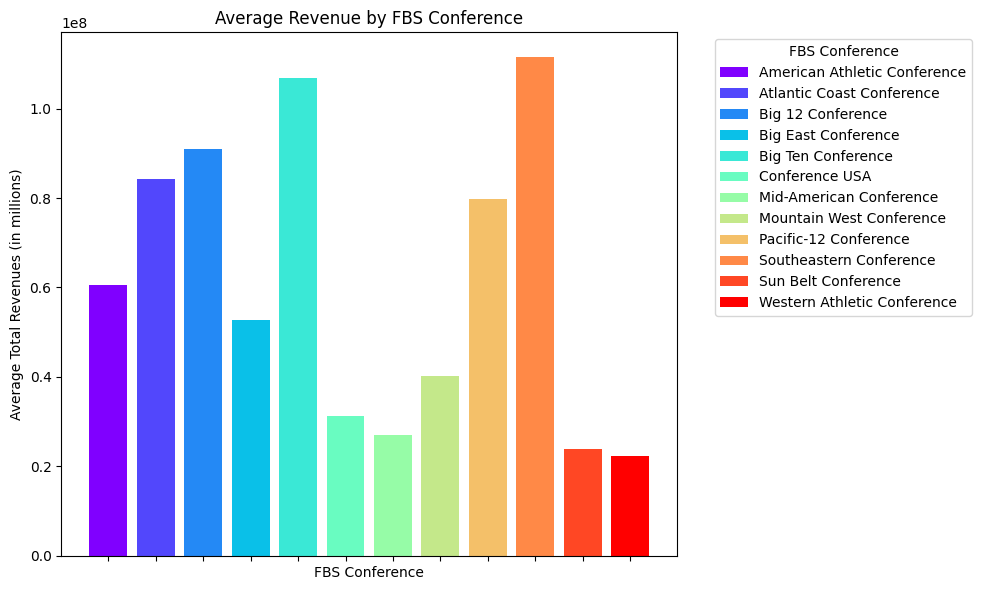

In [22]:
#Revenue by Conf

avg_rev_conf = data.groupby(['FBS Conference'])['Total Revenues'].mean().reset_index()

plt.figure(figsize = (10, 6))

color = iter(cm.rainbow(np.linspace(0, 1, len(avg_rev_conf['FBS Conference']))))

for index, row in avg_rev_conf.iterrows():
    c = next(color)
    plt.bar(row['FBS Conference'], row['Total Revenues'], label = row['FBS Conference'], color = c)

plt.tick_params(
    axis = 'x',          
    which = 'both',             
    labelbottom = False) 

plt.title('Average Revenue by FBS Conference')
plt.xlabel('FBS Conference')
plt.ylabel('Average Total Revenues (in millions)')

plt.legend(title = 'FBS Conference', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.tight_layout()
plt.show()

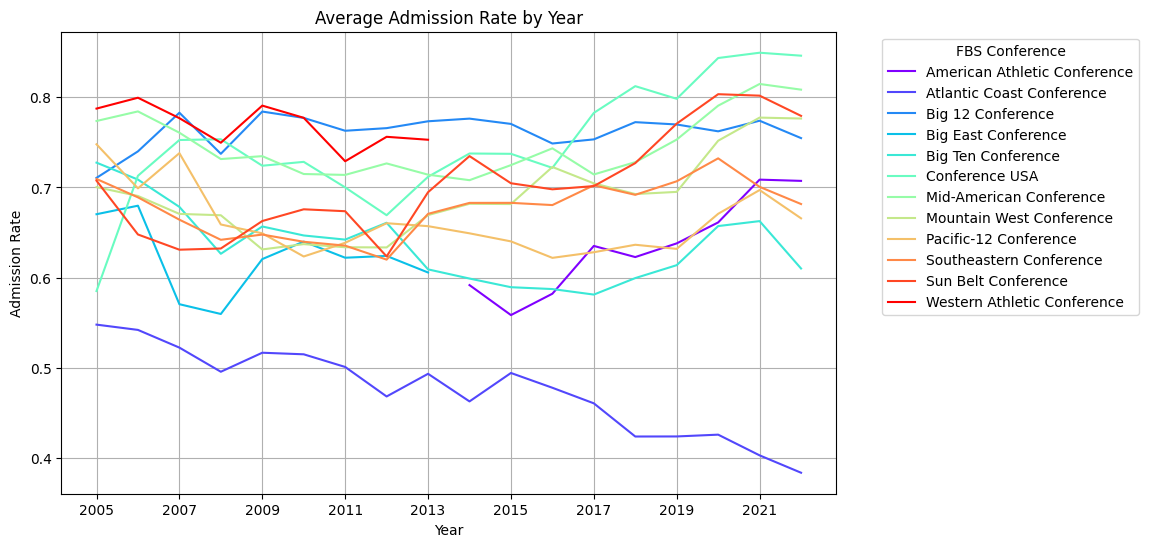

In [23]:
# Average Admission Rate By Year for Each FBS Conference
avg_adm_year = data.groupby(['FBS Conference', 'Year'])['ADM_RATE'].mean().reset_index()
plt.figure(figsize = (10, 6))

color = iter(cm.rainbow(np.linspace(0, 1, len(data['FBS Conference'].unique()))))

for conference, group in avg_adm_year.groupby('FBS Conference'):
    c = next(color)
    plt.plot(group['Year'], group['ADM_RATE'], label = conference, c = c)

plt.xlabel('Year')
plt.ylabel('Admission Rate')
plt.title('Average Admission Rate by Year')
plt.legend(title = 'FBS Conference', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.grid(True)
plt.xticks(np.arange(2005, 2023, step = 2))

plt.show()

In [24]:
# separate by conference
WAC = data[data["FBS Conference"] == "Western Athletic Conference"]
SEC = data[data["FBS Conference"] == "Southeastern Conference"]
SBC = data[data["FBS Conference"] == "Sun Belt Conference"]
PAC12 = data[data["FBS Conference"] == "Pacific-12 Conference"]
MWC = data[data["FBS Conference"] == "Mountain West Conference"]
BIG12 = data[data["FBS Conference"] == "Big 12 Conference"]
BEC = data[data["FBS Conference"] == "Big East Conference"]
MAC = data[data["FBS Conference"] == "Mid-American Conference"]
ACC = data[data["FBS Conference"] == "Atlantic Coast Conference"]
CUSA = data[data["FBS Conference"] == "Conference USA"]
BIG10 = data[data["FBS Conference"] == "Big Ten Conference"]
AAC = data[data["FBS Conference"] == "American Athletic Conference"]

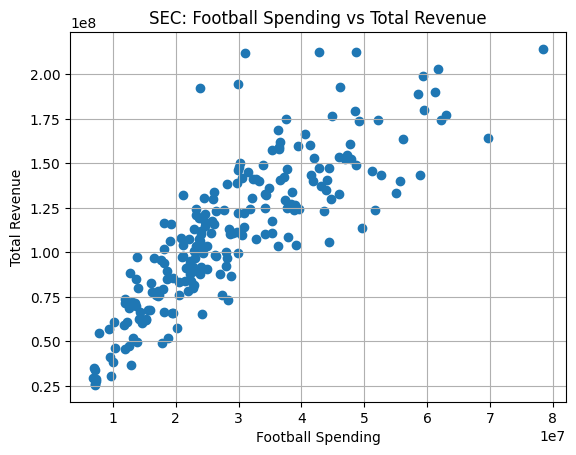

In [25]:
# SEC: FB Spending vs Revenue
plt.scatter(SEC["Total Football Spending"], SEC["Total Revenues"])
plt.title("SEC: Football Spending vs Total Revenue")
plt.xlabel("Football Spending")
plt.ylabel("Total Revenue")
plt.grid(True)

In [26]:
# playoff winners from 2005-2022

winner_info = [2022, "Georgia", 
               2021, "Georgia",
               2020, "Alabama",
               2019, "LSU",
               2018, "Clemson", 
               2017, "Alabama",
               2016, "Clemson",
               2015, "Alabama",
               2014, "Ohio State",
               2013, "Florida State",
               2012, "Alabama",
               2011, "Alabama",
               2010, "Auburn",
               2009, "Alabama",
               2008, "Florida State",
               2007, "LSU",
               2006, "Florida State",
               2005, "Texas"]

years = winner_info[0::2]
unis = winner_info[1::2]

winners_and_years = pd.DataFrame({"Year": years, "unofficial_name": unis})
winning_data = pd.merge(data, winners_and_years, on = ["Year", "unofficial_name"], how = "inner")
winning_data.rename(columns = {"Year":"Playoff Win"}, inplace = True)

In [27]:
# 2014-2022 football playoff winners
### admission rates through the years
### followed by total number of applicants and total number admitted

In [28]:
georgia = (11655/20918, 11604/21945, 12232/22694, 13052/24165, 12723/26164, 13265/29285, 13647/28206, 15685/39229, 16729/39320)
georgia_admitted = (11655, 11604, 12232, 13052, 12723, 13265, 13647, 15685, 16729)
georgia_applied = (20918, 21945, 22694, 24165, 26164, 29285, 28206, 39229, 39320)
years = [2014 + i for i in range(9)]
# plt.plot(georgia)
# plt.xticks(range(len(georgia)), years)
# plt.xlabel("Year")
# plt.ylabel("Admission Rates")
# plt.axvline(x = 7, color = "r")
# plt.axvline(x = 8, color = "r")
# plt.legend("")
# plt.show()

In [29]:
# plt.axvline(x = 7, color = "r")
# plt.axvline(x = 8, color = "r")
# plt.plot(georgia_admitted)
# plt.plot(georgia_applied)
# plt.xticks(range(9), years)
# plt.xlabel("Year")
# plt.ylabel("Applications")
# plt.show()

In [30]:
alabama = (17221/33736, 19400/36203, 20107/38237, 20321/38129, 22032/37302, 31835/38505, 31804/39560, 33472/42421, 43290/54072)
alabama_admitted = (17221, 19400, 20107, 20321, 22032, 31835, 31804, 33472, 43290)
alabama_applied = (33736, 36203, 38237, 38129, 37302, 38505, 39560, 42421, 54072)
# plt.plot(alabama)
# plt.xticks(range(9), years)
# plt.xlabel("Year")
# plt.ylabel("Admission Rates")
# plt.axvline(x = 6, color = "r")
# plt.axvline(x = 3, color = "r")
# plt.axvline(x = 1, color = "r")
# plt.legend("")
# plt.show()

In [31]:
# plt.axvline(x = 6, color = "r")
# plt.axvline(x = 3, color = "r")
# plt.axvline(x = 1, color = "r")
# plt.plot(alabama_admitted)
# plt.plot(alabama_applied)
# plt.xticks(range(9), years)
# plt.xlabel("Year")
# plt.ylabel("Applications")
# plt.show()

In [32]:
LSU = (12706/16580, 13480/17429, 13843/18122, 13236/17907, 18024/24280, 18272/24501, 21252/28960, 25907/36561, 29419/38853)
LSU_admitted = (12706, 13480, 13843, 13236, 18024, 18272, 21252, 25907, 29419)
LSU_applied = (16580, 17429, 18122, 17907, 24280, 24501, 28960, 36561, 38853)
# plt.plot(LSU)
# plt.xticks(range(9), years)
# plt.xlabel("Year")
# plt.ylabel("Admission Rates")
# plt.axvline(x = 5, color = "r")
# plt.legend("")
# plt.show()

In [33]:
# plt.axvline(x = 5, color = "r")
# plt.plot(LSU_admitted)
# plt.plot(LSU_applied)
# plt.xticks(range(9), years)
# plt.xlabel("Year")
# plt.ylabel("Applications")
# plt.show()

In [34]:
clemson = (10694/20756, 11483/22396, 11881/23506, 12380/26242, 13613/28845, 14900/29070, 17715/28600, 23138/47007, 22704/52819)
clemson_admitted = (10694, 11483, 11881, 12380, 13613, 14900, 17715, 23138, 22704)
clemson_applied = (20756, 22396, 23506, 26242, 28845, 29070, 28600, 47007, 52819)
# plt.plot(clemson)
# plt.xticks(range(9), years)
# plt.xlabel("Year")
# plt.ylabel("Admission Rates")
# plt.axvline(x = 4, color = "r")
# plt.axvline(x = 2, color = "r")
# plt.legend("")
# plt.show()

In [35]:
# plt.axvline(x = 2, color = "r")
# plt.axvline(x = 4, color = "r")
# plt.plot(clemson_admitted)
# plt.plot(clemson_applied)
# plt.xticks(range(9), years)
# plt.xlabel("Year")
# plt.ylabel("Applications")
# plt.show()

In [36]:
ohio_state = (19484/36788, 19872/40240, 24265/44845, 22964/47782, 24988/48077, 25634/47703, 33619/49087, 33269/58180, 34370/65189)
ohio_state_admitted = (19484, 19872, 24265, 22964, 24988, 25634, 33619, 33269, 34370)
ohio_state_applied = (36788, 40240, 44845, 47782, 48077, 47703, 49087, 58180, 65189)
# plt.plot(ohio_state)
# plt.xticks(range(9), years)
# plt.xlabel("Year")
# plt.ylabel("Admission Rates")
# plt.axvline(x = 0, color = "r")
# plt.legend("")
# plt.show()

In [37]:
# plt.axvline(x = 0, color = "r")
# plt.plot(ohio_state_admitted)
# plt.plot(ohio_state_applied)
# plt.xticks(range(9), years)
# plt.xlabel("Year")
# plt.ylabel("Applications")
# plt.show()

In [38]:
florida_years = [2006 + i for i in range(17)]
florida_state = (14027/23687, 13415/24343, 11901/25485, 14308/23439, 15498/26037, 16561/28313, 16124/30040, 16803/29579, 16763/30266, 16674/29828, 16840/29027, 17381/35334, 18504/50314, 21202/58936, 20668/63691, 24183/65235, 19552/78088)
florida_state_admitted = (14027, 13415, 11901, 14308, 15498, 16561, 16124, 16803, 16763, 16674, 16840, 17381, 18504, 21202, 20668, 24183, 19552)
florida_state_applied = (23687, 24343, 25485, 23439, 26037, 28313, 30040, 29579, 30266, 29828, 29027, 35334, 50314, 58936, 63691, 65235, 78088)
# plt.plot(florida_state)
# plt.xticks(rotation = 45)
# plt.xticks(range(17), florida_years)
# plt.xlabel("Year")
# plt.ylabel("Admission Rates")
# plt.axvline(x = 0, color = "r")
# plt.axvline(x = 2, color = "r")
# plt.axvline(x = 7, color = "r")
# plt.legend("")
# plt.show()

In [39]:
# plt.axvline(x = 0, color = "r")
# plt.axvline(x = 2, color = "r")
# plt.axvline(x = 7, color = "r")
# plt.plot(florida_state_admitted)
# plt.plot(florida_state_applied)
# plt.xticks(rotation = 45)
# plt.xticks(range(17), florida_years)
# plt.xlabel("Year")
# plt.ylabel("Applications")
# plt.show()

In [40]:
data = data.sort_values(by = ['INSTNM', 'Year'], ascending = [True, False])

data_latest = data.drop_duplicates(subset = ['INSTNM'])

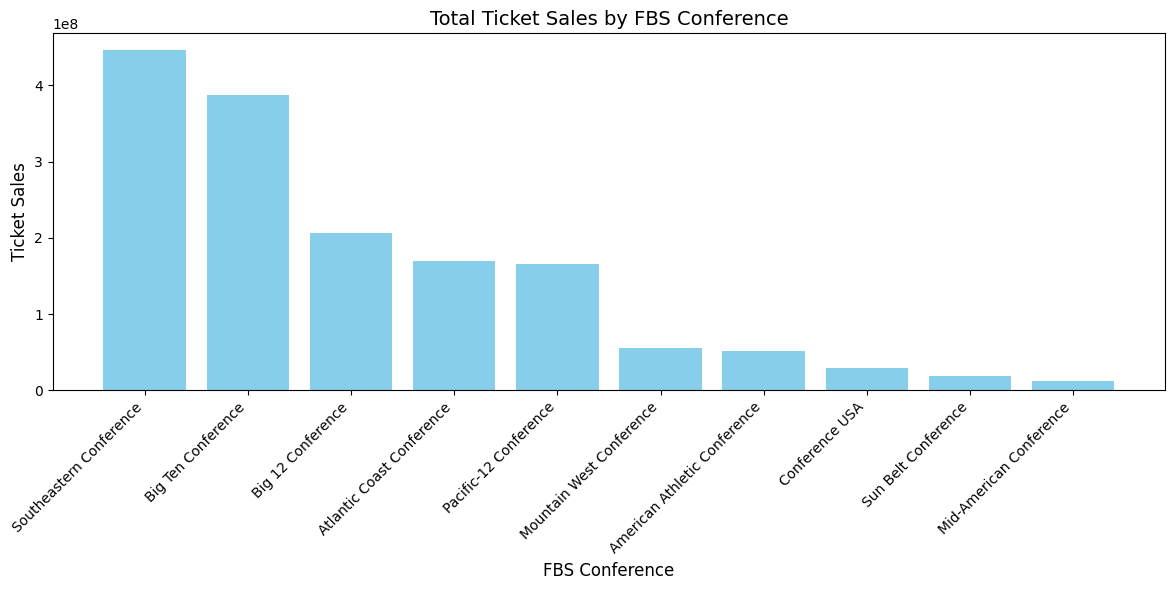

In [41]:
# Total Ticket Sales by FBS Conference
ticket_sales_by_conference = data_latest.groupby('FBS Conference')['Ticket Sales'].sum().reset_index()

ticket_sales_by_conference = ticket_sales_by_conference.sort_values('Ticket Sales', ascending = False)

plt.figure(figsize=(12, 6))
plt.bar(ticket_sales_by_conference['FBS Conference'], ticket_sales_by_conference['Ticket Sales'], color = 'skyblue')

plt.xlabel('FBS Conference', fontsize = 12)
plt.ylabel('Ticket Sales', fontsize = 12)
plt.title('Total Ticket Sales by FBS Conference', fontsize = 14)
plt.xticks(rotation = 45, ha = 'right') 

plt.tight_layout()
plt.show()

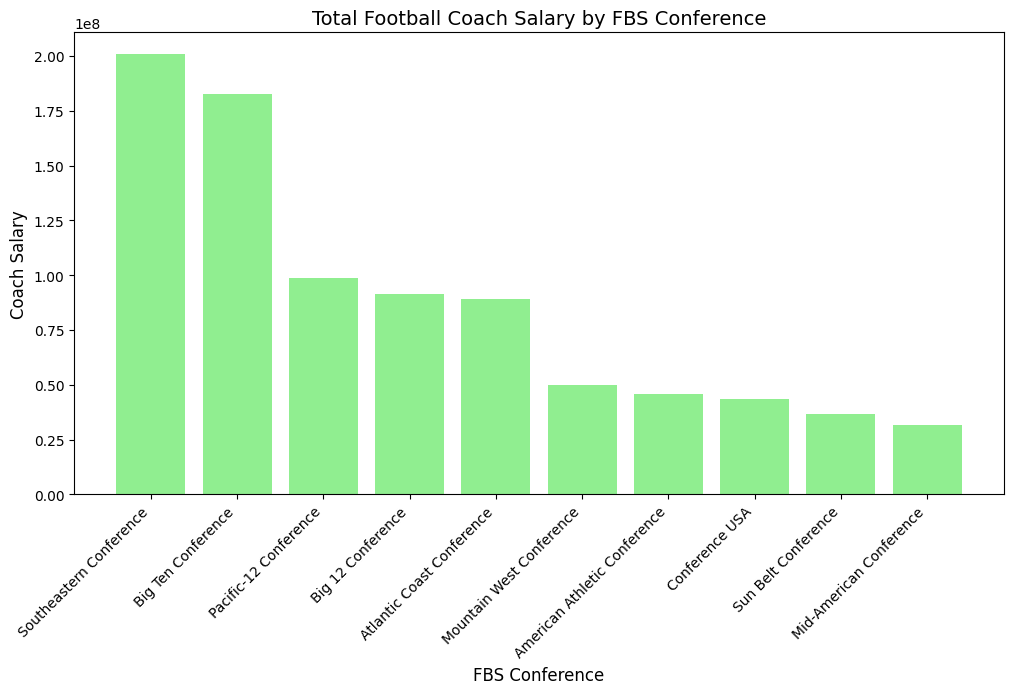

In [42]:
#football coach salary by fbs conference

comp_by_conf = data_latest.groupby('FBS Conference')['Total Football Coaching Salaries'].sum().reset_index()
comp_by_conf.rename(columns = {'Total Football Coaching Salaries': 'Summed Coach Salary'}, inplace=True)
comp_by_conf = comp_by_conf.sort_values('Summed Coach Salary', ascending = False)

plt.figure(figsize = (12, 6))
plt.bar(comp_by_conf['FBS Conference'], comp_by_conf['Summed Coach Salary'], color = 'lightgreen')

plt.xlabel('FBS Conference', fontsize = 12)
plt.ylabel('Coach Salary', fontsize = 12)
plt.title('Total Football Coach Salary by FBS Conference', fontsize = 14)
plt.xticks(rotation = 45, ha = 'right')

plt.show()

In [43]:
# schools by conference
unique_teams = {
    "Western Athletic Conference": WAC["INSTNM"].unique(),
    "Southeastern Conference": SEC["INSTNM"].unique(),
    "Sun Belt Conference": SBC["INSTNM"].unique(),
    "Pacific-12 Conference": PAC12["INSTNM"].unique(),
    "Mountain West Conference": MWC["INSTNM"].unique(),
    "Big 12 Conference": BIG12["INSTNM"].unique(),
    "Big East Conference": BEC["INSTNM"].unique(),
    "Mid-American Conference": MAC["INSTNM"].unique(),
    "Atlantic Coast Conference": ACC["INSTNM"].unique(),
    "Conference USA": CUSA["INSTNM"].unique(),
    "Big Ten Conference": BIG10["INSTNM"].unique(),
    "American Athletic Conference": AAC["INSTNM"].unique()
}

teams_by_conference = pd.DataFrame(
    [(conference, ", ".join(teams)) for conference, teams in unique_teams.items()],
    columns=["Conference", "Teams"]
)

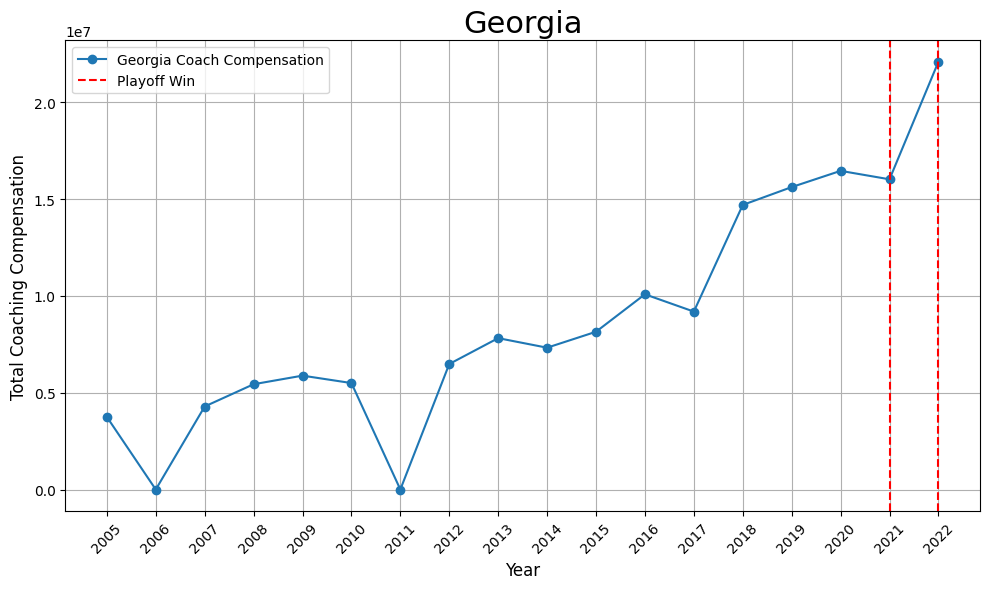

In [44]:
# SEC
years2 = [2005 + i for i in range(18)]

Georgia = data[data['unofficial_name'] == "Georgia"]

compensation_by_year = Georgia.groupby('Year')['Total Football Coaching Salaries'].sum().reset_index()

plt.figure(figsize = (10, 6))
plt.plot(compensation_by_year['Year'], compensation_by_year['Total Football Coaching Salaries'], marker = 'o', label = "Georgia Coach Compensation")

plt.xlabel('Year', fontsize = 12)
plt.ylabel('Total Coaching Compensation', fontsize = 12)
plt.title("Georgia", fontsize = 22)

plt.xticks(compensation_by_year['Year'], labels = compensation_by_year['Year'], rotation = 45)

plt.axvline(x = 2021, color = "r", linestyle = "--", label = "Playoff Win")
plt.axvline(x = 2022, color = "r", linestyle = "--")

plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

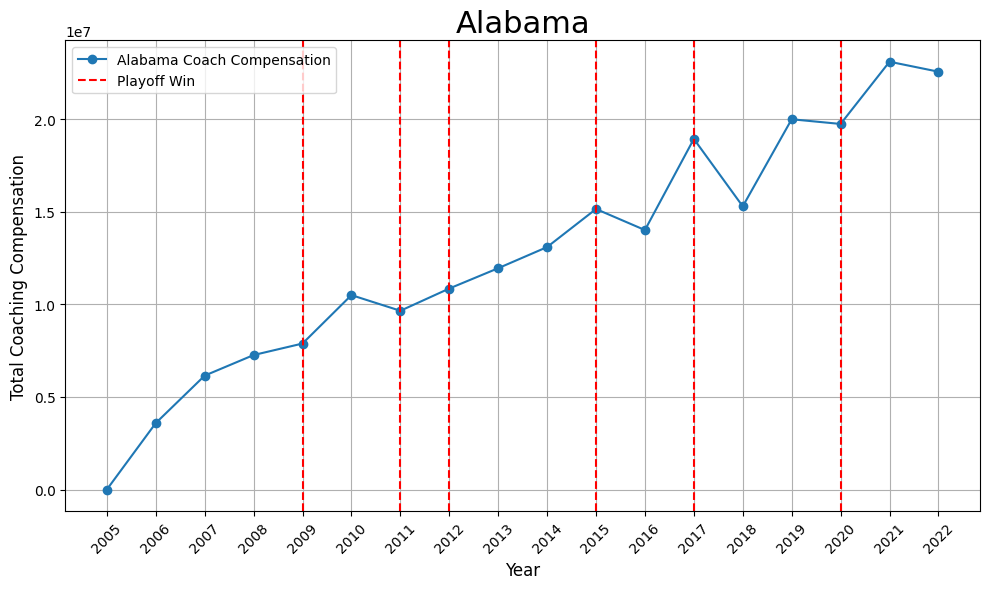

In [45]:
#SEC

Alabama = data[data['unofficial_name'] == "Alabama"]

compensation_by_year = Alabama.groupby('Year')['Total Football Coaching Salaries'].sum().reset_index()

plt.figure(figsize = (10, 6))
plt.plot(compensation_by_year['Year'], compensation_by_year['Total Football Coaching Salaries'], marker = 'o', label = "Alabama Coach Compensation")

plt.xlabel('Year', fontsize = 12)
plt.ylabel('Total Coaching Compensation', fontsize = 12)
plt.title("Alabama", fontsize = 22)

plt.xticks(compensation_by_year['Year'], labels = compensation_by_year['Year'], rotation = 45)

plt.axvline(x = 2020, color = "r", linestyle = "--", label = "Playoff Win")
plt.axvline(x = 2017, color = "r", linestyle = "--")
plt.axvline(x = 2015, color = "r", linestyle = "--")
plt.axvline(x = 2012, color = "r", linestyle = "--")
plt.axvline(x = 2011, color = "r", linestyle = "--")
plt.axvline(x = 2009, color = "r", linestyle = "--")

plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

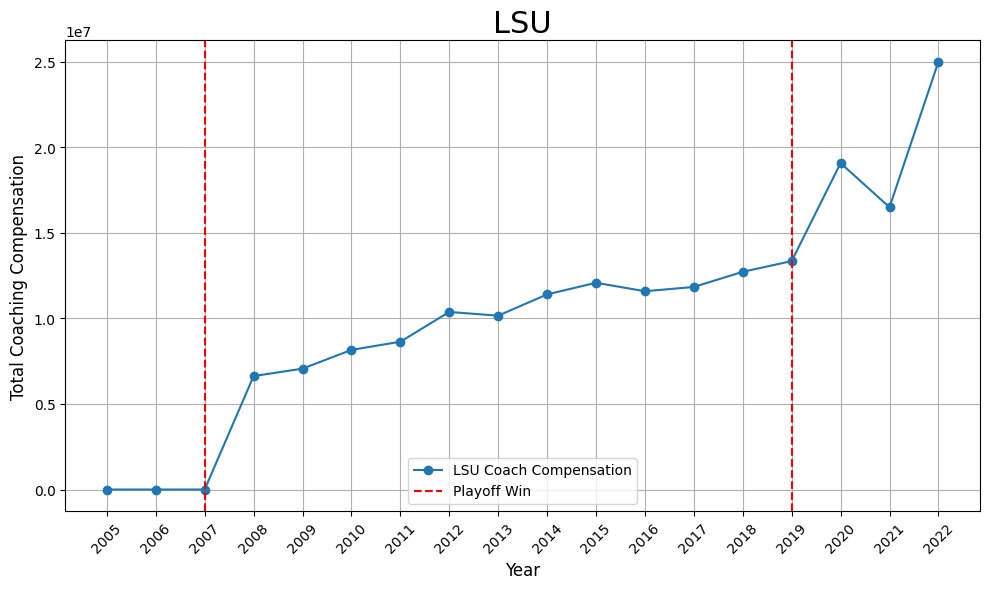

In [46]:
#SEC
LSU = data[data['unofficial_name'] == "LSU"]

compensation_by_year = LSU.groupby('Year')['Total Football Coaching Salaries'].sum().reset_index()

plt.figure(figsize = (10, 6))
plt.plot(compensation_by_year['Year'], compensation_by_year['Total Football Coaching Salaries'], marker = 'o', label = "LSU Coach Compensation")

plt.xlabel('Year', fontsize = 12)
plt.ylabel('Total Coaching Compensation', fontsize = 12)
plt.title("LSU", fontsize = 22)

plt.xticks(compensation_by_year['Year'], labels = compensation_by_year['Year'], rotation = 45)

plt.axvline(x = 2019, color = "r", linestyle = "--", label = "Playoff Win")
plt.axvline(x = 2007, color = "r", linestyle = "--")

plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

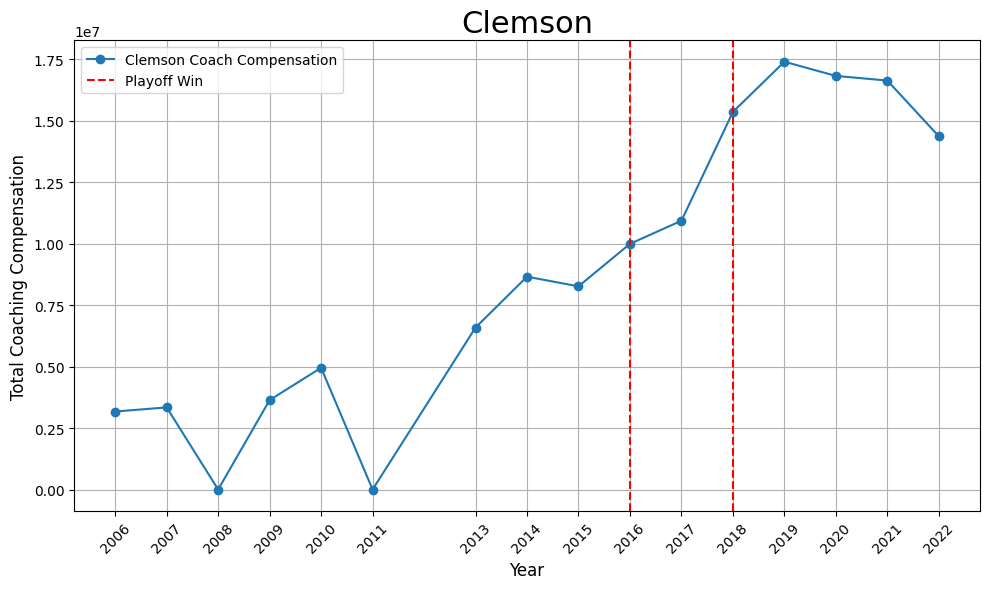

In [47]:
#ACC 
Clemson = data[data['unofficial_name'] == "Clemson"]

compensation_by_year = Clemson.groupby('Year')['Total Football Coaching Salaries'].sum().reset_index()

plt.figure(figsize = (10, 6))
plt.plot(compensation_by_year['Year'], compensation_by_year['Total Football Coaching Salaries'], marker = 'o', label = "Clemson Coach Compensation")

plt.xlabel('Year', fontsize = 12)
plt.ylabel('Total Coaching Compensation', fontsize = 12)
plt.title("Clemson", fontsize = 22)

plt.xticks(compensation_by_year['Year'], labels=compensation_by_year['Year'], rotation = 45)

plt.axvline(x = 2016, color = "r", linestyle = "--", label = "Playoff Win")
plt.axvline(x = 2018, color = "r", linestyle = "--")

plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

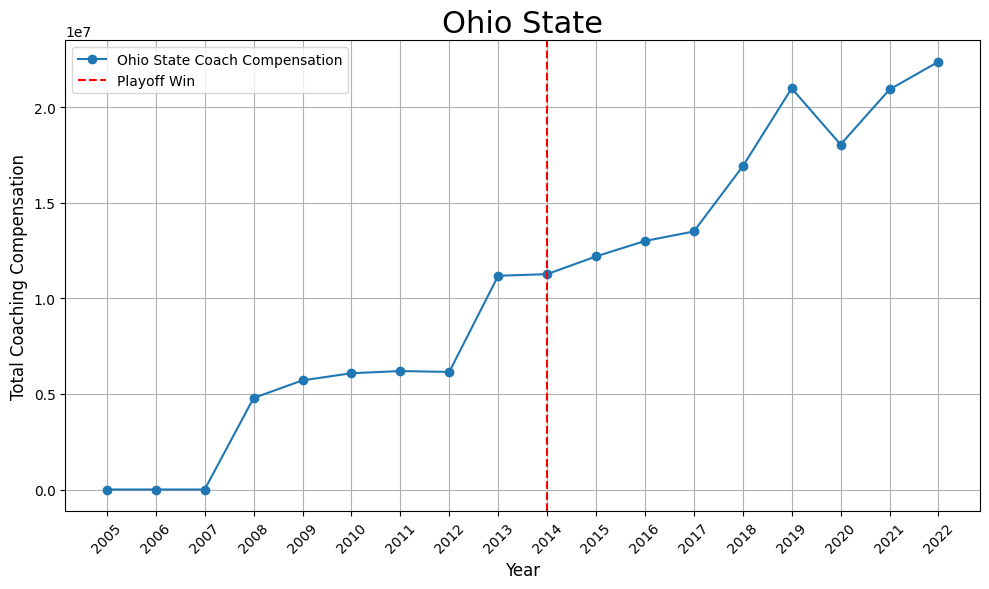

In [48]:
#Big 10
Ohio_State = data[data['unofficial_name'] == "Ohio State"]

compensation_by_year = Ohio_State.groupby('Year')['Total Football Coaching Salaries'].sum().reset_index()

plt.figure(figsize = (10, 6))
plt.plot(compensation_by_year['Year'], compensation_by_year['Total Football Coaching Salaries'], marker = 'o', label = "Ohio State Coach Compensation")

plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Coaching Compensation', fontsize = 12)
plt.title("Ohio State", fontsize = 22)

plt.xticks(compensation_by_year['Year'], labels = compensation_by_year['Year'], rotation = 45)

plt.axvline(x = 2014, color = "r", linestyle = "--", label = "Playoff Win")

plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

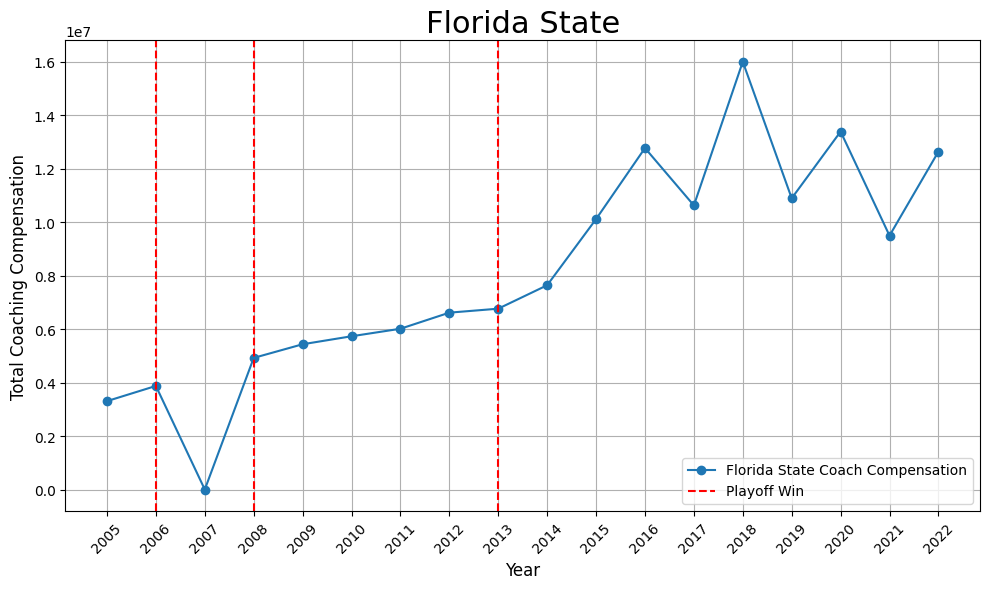

In [49]:
#ACC
Florida_State = data[data['unofficial_name'] == "Florida State"]

compensation_by_year = Florida_State.groupby('Year')['Total Football Coaching Salaries'].sum().reset_index()

plt.figure(figsize = (10, 6))
plt.plot(compensation_by_year['Year'], compensation_by_year['Total Football Coaching Salaries'], marker = 'o', label = "Florida State Coach Compensation")

plt.xlabel('Year', fontsize = 12)
plt.ylabel('Total Coaching Compensation', fontsize = 12)
plt.title("Florida State", fontsize = 22)

plt.xticks(compensation_by_year['Year'], labels = compensation_by_year['Year'], rotation = 45)

plt.axvline(x = 2013, color = "r", linestyle = "--", label = "Playoff Win")
plt.axvline(x = 2008, color = "r", linestyle = "--")
plt.axvline(x = 2006, color = "r", linestyle = "--")

plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

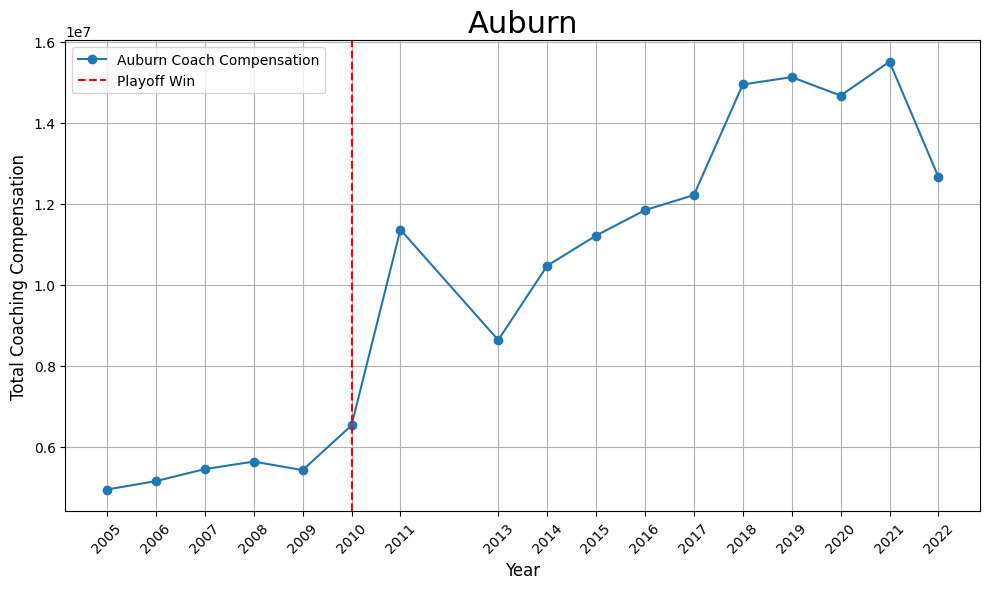

In [50]:
#SEC
Auburn = data[data['unofficial_name'] == "Auburn"]

compensation_by_year = Auburn.groupby('Year')['Total Football Coaching Salaries'].sum().reset_index()

plt.figure(figsize = (10, 6))
plt.plot(compensation_by_year['Year'], compensation_by_year['Total Football Coaching Salaries'], marker = 'o', label = "Auburn Coach Compensation")

plt.xlabel('Year', fontsize = 12)
plt.ylabel('Total Coaching Compensation', fontsize = 12)
plt.title("Auburn", fontsize = 22)

plt.xticks(compensation_by_year['Year'], labels = compensation_by_year['Year'], rotation = 45)

plt.axvline(x = 2010, color = "r", linestyle = "--", label = "Playoff Win")

plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [51]:
### DONOR CONTRIBUTIONS AFTER PLAYOFF WINS

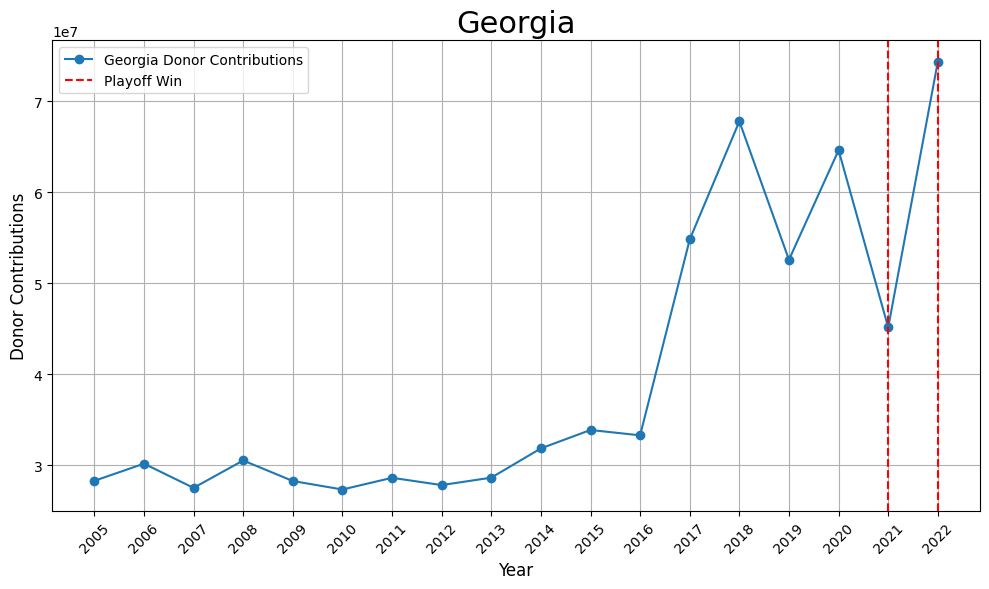

In [52]:
# SEC
years2 = [2005 + i for i in range(18)]

donor_by_year = Georgia.groupby('Year')['Donor Contributions'].sum().reset_index()

plt.figure(figsize = (10, 6))
plt.plot(donor_by_year['Year'], donor_by_year['Donor Contributions'], marker = 'o', label = "Georgia Donor Contributions")

plt.xlabel('Year', fontsize=12)
plt.ylabel('Donor Contributions', fontsize = 12)
plt.title("Georgia", fontsize=22)

plt.xticks(donor_by_year['Year'], labels = donor_by_year['Year'], rotation = 45)

plt.axvline(x = 2021, color = "r", linestyle = "--", label = "Playoff Win")
plt.axvline(x = 2022, color = "r", linestyle = "--")

plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

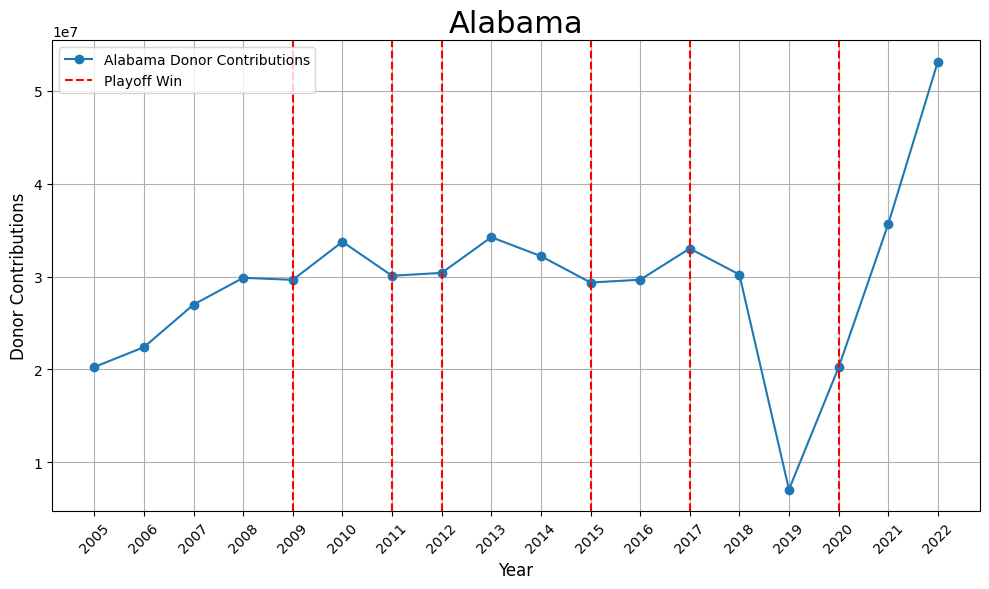

In [53]:
#SEC

donor_by_year = Alabama.groupby('Year')['Donor Contributions'].sum().reset_index()

plt.figure(figsize = (10, 6))
plt.plot(donor_by_year['Year'], donor_by_year['Donor Contributions'], marker = 'o', label = "Alabama Donor Contributions")

plt.xlabel('Year', fontsize = 12)
plt.ylabel('Donor Contributions', fontsize = 12)
plt.title("Alabama", fontsize = 22)

plt.xticks(donor_by_year['Year'], labels = donor_by_year['Year'], rotation = 45)

plt.axvline(x = 2020, color = "r", linestyle = "--", label = "Playoff Win")
plt.axvline(x = 2017, color = "r", linestyle = "--")
plt.axvline(x = 2015, color = "r", linestyle = "--")
plt.axvline(x = 2012, color = "r", linestyle = "--")
plt.axvline(x = 2011, color = "r", linestyle = "--")
plt.axvline(x = 2009, color = "r", linestyle = "--")

plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

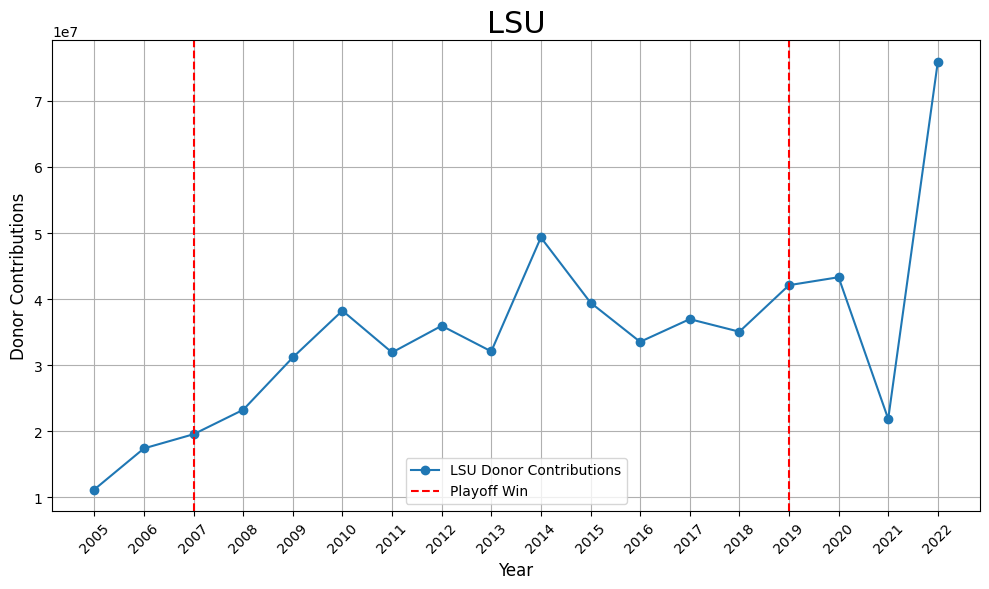

In [54]:
#SEC

donor_by_year = LSU.groupby('Year')['Donor Contributions'].sum().reset_index()

plt.figure(figsize = (10, 6))
plt.plot(donor_by_year['Year'], donor_by_year['Donor Contributions'], marker = 'o', label = "LSU Donor Contributions")

plt.xlabel('Year', fontsize = 12)
plt.ylabel('Donor Contributions', fontsize = 12)
plt.title("LSU", fontsize = 22)

plt.xticks(donor_by_year['Year'], labels = donor_by_year['Year'], rotation = 45)

plt.axvline(x = 2019, color = "r", linestyle = "--", label = "Playoff Win")
plt.axvline(x = 2007, color = "r", linestyle = "--")

plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

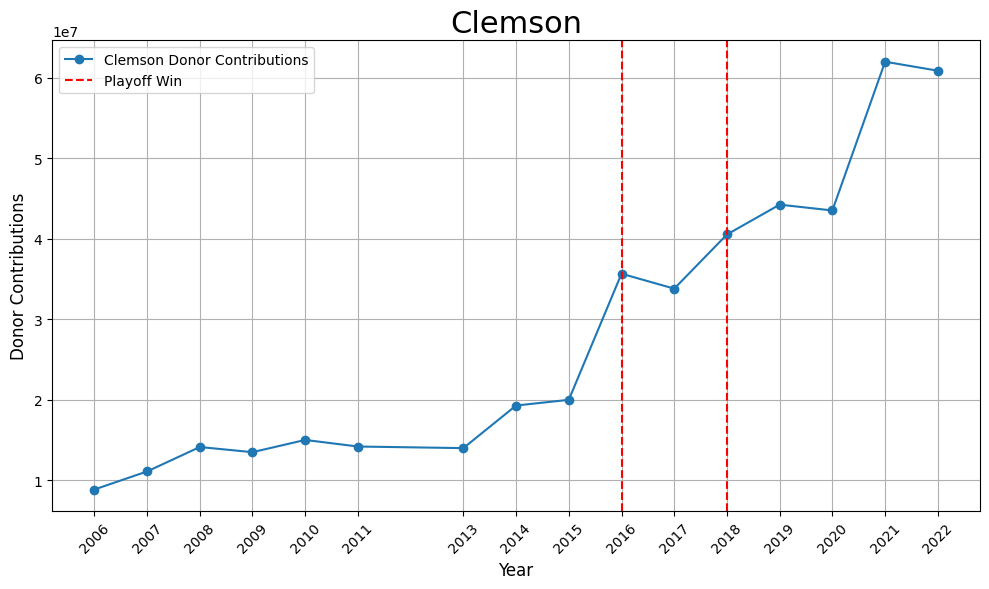

In [55]:
#ACC

donor_by_year = Clemson.groupby('Year')['Donor Contributions'].sum().reset_index()

plt.figure(figsize = (10, 6))
plt.plot(donor_by_year['Year'], donor_by_year['Donor Contributions'], marker = 'o', label = "Clemson Donor Contributions")

plt.xlabel('Year', fontsize = 12)
plt.ylabel('Donor Contributions', fontsize = 12)
plt.title("Clemson", fontsize = 22)

plt.xticks(donor_by_year['Year'], labels = donor_by_year['Year'], rotation = 45)

plt.axvline(x = 2016, color = "r", linestyle = "--", label = "Playoff Win")
plt.axvline(x = 2018, color = "r", linestyle = "--")

plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

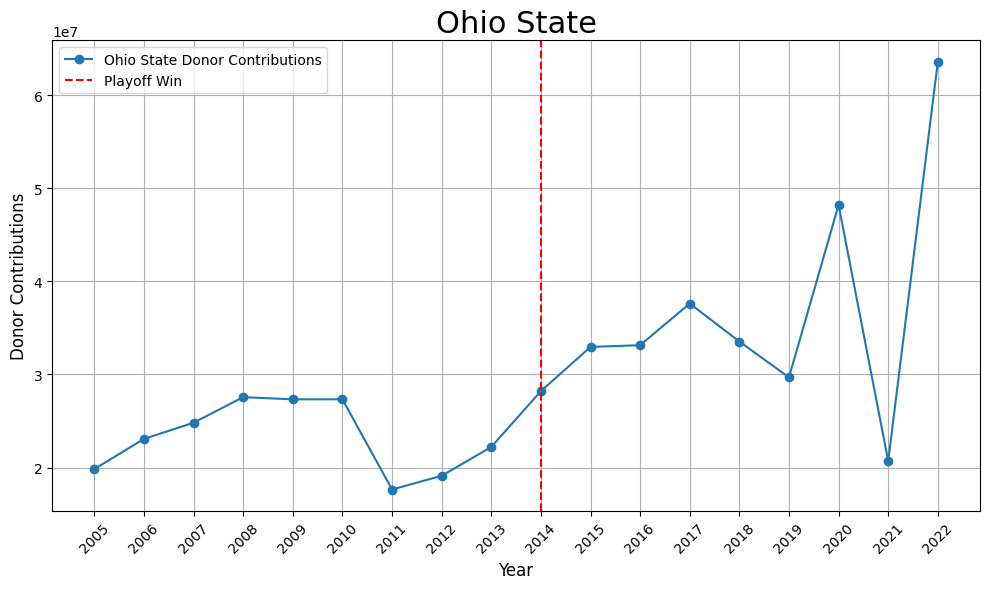

In [56]:
#Big 10

donor_by_year = Ohio_State.groupby('Year')['Donor Contributions'].sum().reset_index()

plt.figure(figsize = (10, 6))
plt.plot(donor_by_year['Year'], donor_by_year['Donor Contributions'], marker = 'o', label = "Ohio State Donor Contributions")

plt.xlabel('Year', fontsize = 12)
plt.ylabel('Donor Contributions', fontsize = 12)
plt.title("Ohio State", fontsize = 22)

plt.xticks(donor_by_year['Year'], labels = donor_by_year['Year'], rotation = 45)

plt.axvline(x = 2014, color = "r", linestyle = "--", label = "Playoff Win")

plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

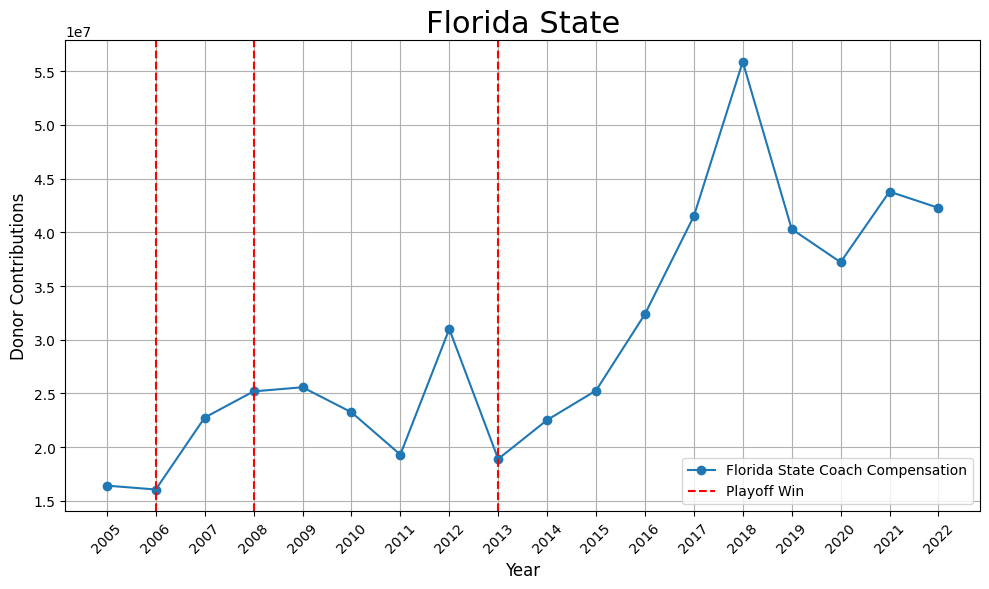

In [57]:
#ACC
Florida_State = data[data['unofficial_name'] == "Florida State"]

donor_by_year = Florida_State.groupby('Year')['Donor Contributions'].sum().reset_index()

plt.figure(figsize = (10, 6))
plt.plot(donor_by_year['Year'], donor_by_year['Donor Contributions'], marker = 'o', label = "Florida State Coach Compensation")

plt.xlabel('Year', fontsize = 12)
plt.ylabel('Donor Contributions', fontsize = 12)
plt.title("Florida State", fontsize = 22)

plt.xticks(donor_by_year['Year'], labels = donor_by_year['Year'], rotation = 45)

plt.axvline(x = 2013, color = "r", linestyle = "--", label = "Playoff Win")
plt.axvline(x = 2008, color = "r", linestyle = "--")
plt.axvline(x = 2006, color = "r", linestyle = "--")

plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

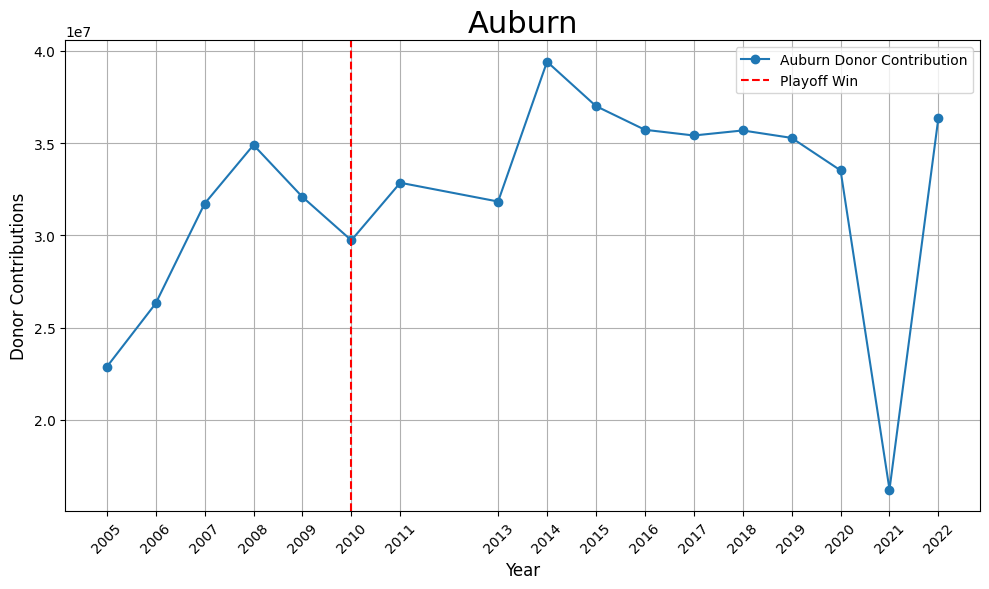

In [58]:
#SEC
donor_by_year = Auburn.groupby('Year')['Donor Contributions'].sum().reset_index()

plt.figure(figsize = (10, 6))
plt.plot(donor_by_year['Year'], donor_by_year['Donor Contributions'], marker = 'o', label = "Auburn Donor Contribution")

plt.xlabel('Year', fontsize = 12)
plt.ylabel('Donor Contributions', fontsize = 12)
plt.title("Auburn", fontsize = 22)

plt.xticks(donor_by_year['Year'], labels=donor_by_year['Year'], rotation = 45)

plt.axvline(x = 2010, color = "r", linestyle = "--", label = "Playoff Win")

plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

#### Methods

In [59]:
#include playoff win year
winning_data = winning_data[["UNITID", "Playoff Win"]]
winning = winning_data.merge(data, on = "UNITID", how = "left")
winners_and_years.rename(columns = {"Year":"Playoff Win"}, inplace = True)

merged = winning.merge(winners_and_years, on = ["unofficial_name", "Playoff Win"], how="left")

# binary variable indicating if the school won the playoff that year
merged['Playoff Win Bin'] = np.where(merged['Year'] == merged['Playoff Win'], 1, 0)

In [60]:
salary_changes = {}

for school in merged['unofficial_name'].unique():
    school_data = merged[merged['unofficial_name'] == school]
    
    school_data = school_data.dropna(subset = ['Total Football Coaching Salaries', 'Playoff Win'])
    school_data = school_data.sort_values(by = 'Year')

    school_salary_changes = []

    for i in range(len(school_data)): 
        if school_data.iloc[i]['Playoff Win Bin'] == 1:  # check if playoff win year
            cur_year_salary = school_data.iloc[i]['Total Football Coaching Salaries']
            cur_year = school_data.iloc[i]['Year']
            
            # find the next available salary (after the playoff year)
            for j in range(i + 1, len(school_data)):
                next_year_salary = school_data.iloc[j]['Total Football Coaching Salaries']
                next_year = school_data.iloc[j]['Year']
                
                # next valid year, not the same year
                if next_year > cur_year and pd.notna(next_year_salary):
                
                    # change in salary after a playoff win
                    salary_change = next_year_salary - cur_year_salary
                    
                    if salary_change != 0:
                        school_salary_changes.append(salary_change)
                    break

    if school_salary_changes:
        salary_changes[school] = school_salary_changes

# salary changes for each school after playoff wins
print("Changes in Coaching Compensation after Football Playoff Wins:")
for school, changes in salary_changes.items():
    for idx, change in enumerate(changes, 1):
        print(f"{school} -  Win #{idx}: {change}")

# statistical testing (one-sample t-test on salary changes)
salary_diffs = [change for changes in salary_changes.values() for change in changes]

# at least two data points for the t-test
if len(salary_diffs) > 1:
    t_stat, p_value = stats.ttest_1samp(salary_diffs, 0)  # test if the avg salary change is significantly diff from 0
    print(f"\nT-test results for salary change:\nT-statistic: {t_stat}, P-value: {p_value}")


Changes in Coaching Compensation after Football Playoff Wins:
Texas -  Win #1: 5387910.0
Florida State -  Win #1: 1048048.0
Florida State -  Win #2: 510517.0
Florida State -  Win #3: 876292.0
LSU -  Win #1: 6631640.0
LSU -  Win #2: 5729597.0
Alabama -  Win #1: 2616455.0
Alabama -  Win #2: 1202210.0
Alabama -  Win #3: 1097493.0
Alabama -  Win #4: -1136432.0
Alabama -  Win #5: -3643272.0
Alabama -  Win #6: 3362551.0
Auburn -  Win #1: 4836175.0
Ohio State -  Win #1: 928572.0
Clemson -  Win #1: 938992.0
Clemson -  Win #2: 2041713.0
Georgia -  Win #1: 6072329.0

T-test results for salary change:
T-statistic: 3.377331553451216, P-value: 0.0038394693530821797


In [61]:
tix_changes = {}

for school in merged['unofficial_name'].unique():
    school_data = merged[merged['unofficial_name'] == school]
    school_data = school_data.dropna(subset = ['Ticket Sales', 'Playoff Win'])
    school_data = school_data.sort_values(by = 'Year')

    tix_sale_changes = []

    for i in range(len(school_data)): 
        if school_data.iloc[i]['Playoff Win Bin'] == 1:  # playoff win year?
            cur_year_tix = school_data.iloc[i]['Ticket Sales']
            cur_year = school_data.iloc[i]['Year']
            
            # year after playoff win 
            for j in range(i + 1, len(school_data)):
                next_year_tix = school_data.iloc[j]['Ticket Sales']
                next_year = school_data.iloc[j]['Year']
                
                # next valid year, not the same year
                if next_year > cur_year and pd.notna(next_year_tix):
                    tix_change = next_year_tix - cur_year_tix
                    
                    # non-zero changes
                    if tix_change != 0:
                        tix_sale_changes.append(tix_change)
                    break  # exit after finding the next valid year

    if tix_sale_changes:
        tix_changes[school] = tix_sale_changes

# ticket sales changes after playoff wins
print("Changes in Ticket Sales after Football Playoff Wins:")
for school, changes in tix_changes.items():
    for idx, change in enumerate(changes, 1):
        print(f"{school} - Win #{idx}: {change}")

# statistical testing (one-sample t-test on ticket sales changes)
tix_diffs = [change for changes in tix_changes.values() for change in changes]

# at least two data points for the t-test
if len(tix_diffs) > 1:
    t_stat, p_value = stats.ttest_1samp(tix_diffs, 0)  # change in ticket sales significantly diff from 0?
    print(f"\nT-test results for ticket sales change:\nT-statistic: {t_stat}, P-value: {p_value}")


Changes in Ticket Sales after Football Playoff Wins:
Texas - Win #1: 772684.0
Florida State - Win #1: 2018382.0
Florida State - Win #2: 4866846.0
Florida State - Win #3: 5247987.0
LSU - Win #1: 218681.0
LSU - Win #2: -464298.0
Alabama - Win #1: 1263024.0
Alabama - Win #2: 1330798.0
Alabama - Win #3: 5861284.0
Alabama - Win #4: 882692.0
Alabama - Win #5: 601330.0
Alabama - Win #6: -31954139.0
Auburn - Win #1: 4244596.0
Ohio State - Win #1: 7147300.0
Clemson - Win #1: 2423138.0
Clemson - Win #2: 1067639.0
Georgia - Win #1: 32463001.0

T-test results for ticket sales change:
T-statistic: 0.7928177309340861, P-value: 0.43948262121566506


In [62]:
contri_changes = {}

for school in merged['unofficial_name'].unique():
    school_data = merged[merged['unofficial_name'] == school]
    school_data = school_data.dropna(subset = ['Donor Contributions', 'Playoff Win'])
    school_data = school_data.sort_values(by = 'Year')
    donor_contributions_changes = []

    for i in range(len(school_data)): 
        if school_data.iloc[i]['Playoff Win Bin'] == 1:  # check if playoff win year
            cur_year_contri = school_data.iloc[i]['Donor Contributions']
            cur_year = school_data.iloc[i]['Year']
            
            # donor contributions after the playoff win year
            for j in range(i + 1, len(school_data)):
                next_year_contri = school_data.iloc[j]['Donor Contributions']
                next_year = school_data.iloc[j]['Year']
                
                # considering the next year, not the same year
                if next_year > cur_year and pd.notna(next_year_contri):
                    contri_change = next_year_contri - cur_year_contri
                    
                    # append non zero change
                    if contri_change != 0:
                        donor_contributions_changes.append(contri_change)
                    break  # stop after finding the first valid next year

    if donor_contributions_changes:
        contri_changes[school] = donor_contributions_changes

# donor contributions changes after football playoff wins
print("Changes in Donor Contributions after Football Playoff Wins:")
for school, changes in contri_changes.items():
    for idx, change in enumerate(changes, 1):
        print(f"{school} - Win #{idx}: {change}")

# Statistical testing (one-sample t-test on donor contributions changes)
contri_diffs = [change for changes in contri_changes.values() for change in changes]

# At least two data points for the t-test
if len(contri_diffs) > 1:
    t_stat, p_value = stats.ttest_1samp(contri_diffs, 0)  # Test if the average change is significantly different from 0
    print(f"\nT-test results for donor contribution change:\nT-statistic: {t_stat}, P-value: {p_value}")


Changes in Donor Contributions after Football Playoff Wins:
Texas - Win #1: 4183329
Florida State - Win #1: 6698496
Florida State - Win #2: 382085
Florida State - Win #3: 3627456
LSU - Win #1: 3696108
LSU - Win #2: 1203890
Alabama - Win #1: 4097250
Alabama - Win #2: 308497
Alabama - Win #3: 3842437
Alabama - Win #4: 296897
Alabama - Win #5: -2798205
Alabama - Win #6: 15426998
Auburn - Win #1: 3118355
Ohio State - Win #1: 4749414
Clemson - Win #1: -1856306
Clemson - Win #2: 3707695
Georgia - Win #1: 29166659

T-test results for donor contribution change:
T-statistic: 2.591692215292047, P-value: 0.01966981653085234
